<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Learning_path_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split



file_path = '/content/updated_merged_data_19102024.xlsx'
data = pd.read_excel(file_path)
display(pd.DataFrame(data))




timestamp  userid  toolid  activityid  competency_weight  \
0     1/02/24, 10:46:00   18630  233150       10503             0.0133   
1     1/03/24, 09:50:22   21041  233162       20807             0.0400   
2     1/03/24, 09:50:32   21041  233162       20807             0.0400   
3     1/03/24, 09:50:37   21041  256461       30807             0.0400   
4     1/03/24, 09:57:15   21041  256461       30807             0.0400   
...                 ...     ...     ...         ...                ...   
7470  9/05/24, 16:09:17   29275  233172       30707             0.0400   
7471  9/05/24, 16:09:24   29275  256461       20807             0.0400   
7472  9/06/24, 00:22:05   26342  233140       10303             0.0133   
7473  9/06/24, 21:31:13   26502  258703       40807             0.0667   
7474  9/06/24, 21:31:13   26502  258703       40809             0.0667   

      tool_weight  activity_weight  log_weight  performance  attainment  
0          0.0092           0.0320     0.00300     0.010435           1  
1          0.0990           0.0990     0.00400     0.004000           1  
2          0.0990           0.0990     0.00400     0.004000           1  
3          0.0428           0.1337     0.00400     0.012495           1  
4          0.0428           0.1337     0.00400     0.012495           1  
...           ...              ...         ...          ...         ...  
7470       0.0400           0.1309     0.00556     0.018195           1  
7471       0.0428           0.1337     0.00556     0.017369           1  
7472       0.0062           0.0516     0.01520     0.126503           0  
7473       0.0677           0.1783     0.00270     0.007111           1  
7474       0.0677           0.1783     0.00270     0.007111           1  

[7475 rows x 10 columns]

<ipython-input-18-53b8d2ec189d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamps are in datetime format


Visualizing learning path for User 18630


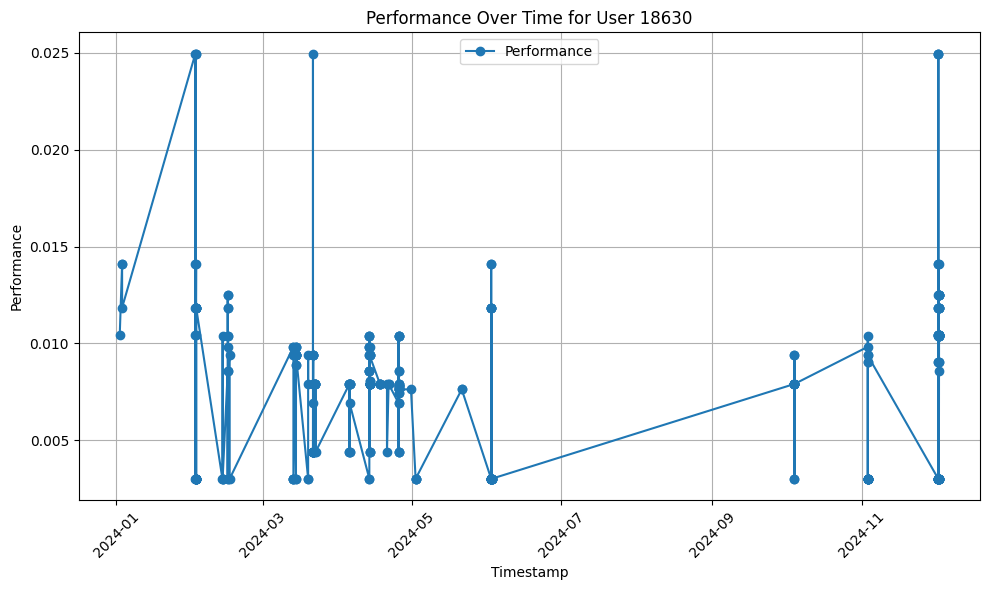

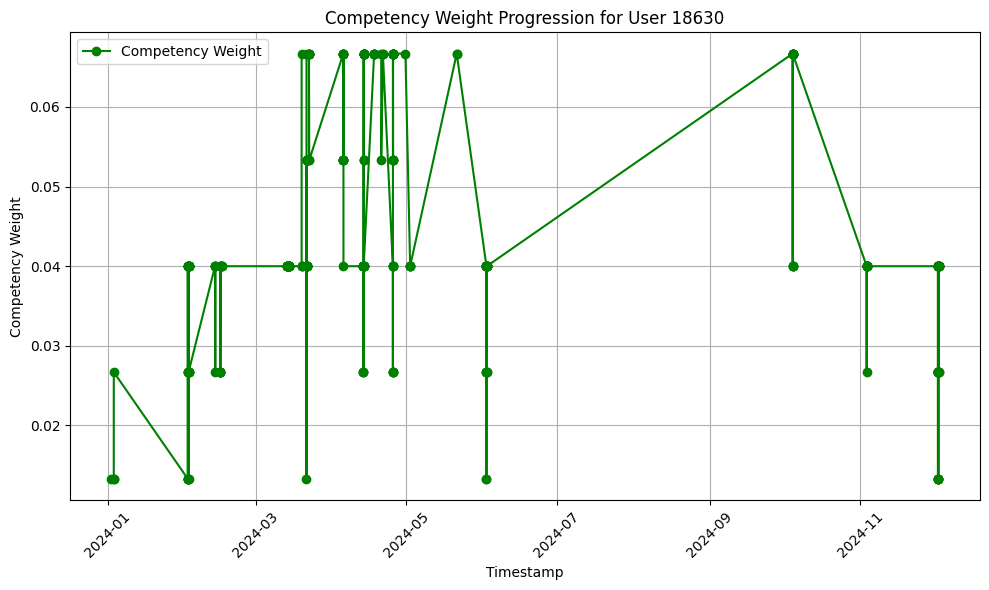

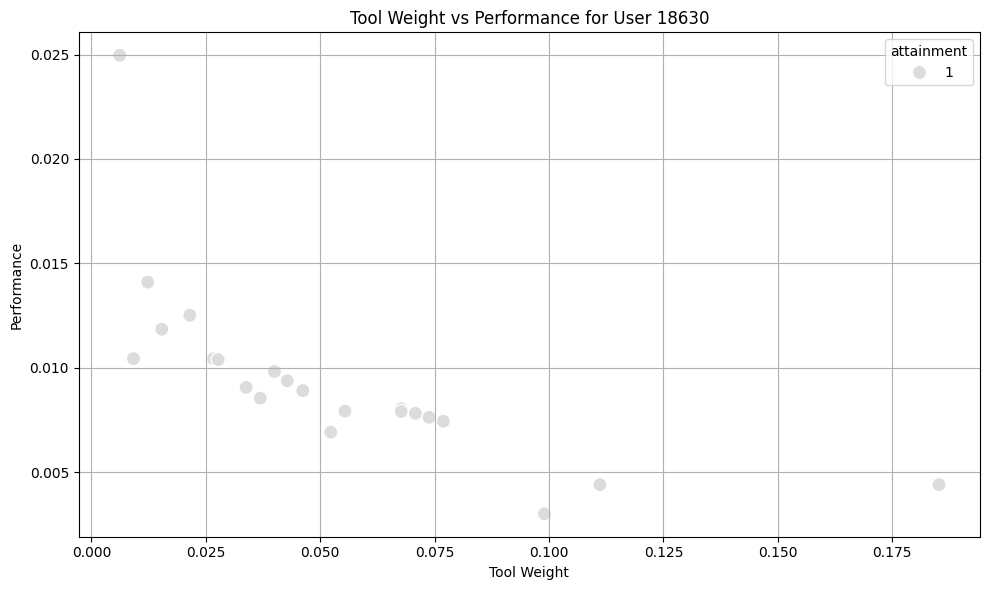

Visualizing learning path for User 20551


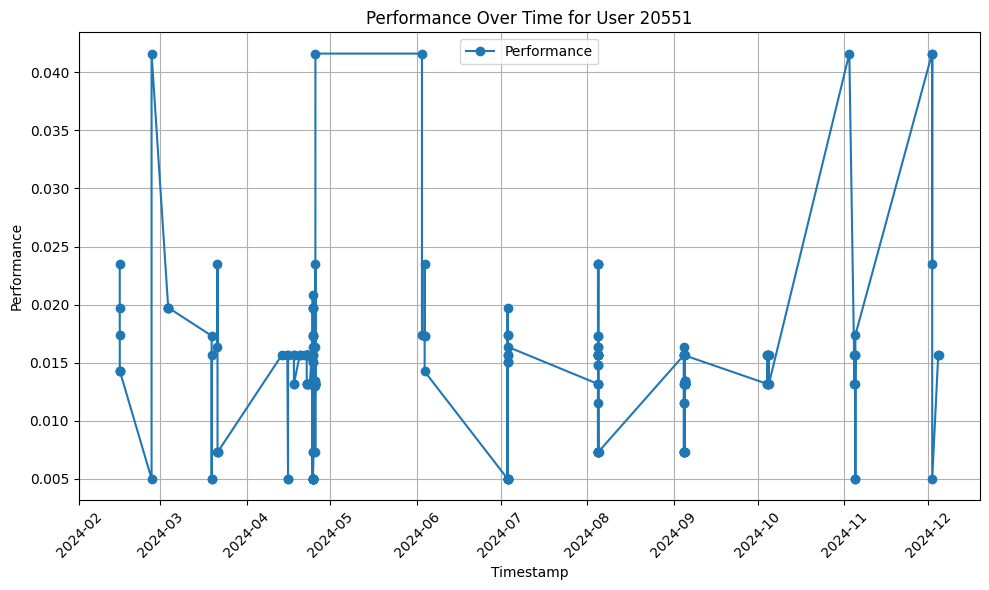

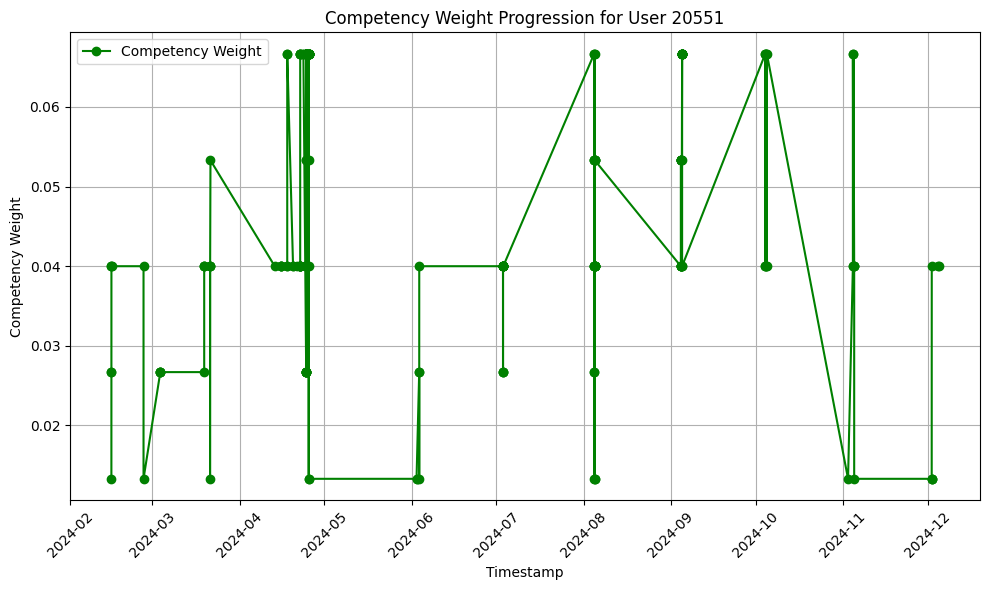

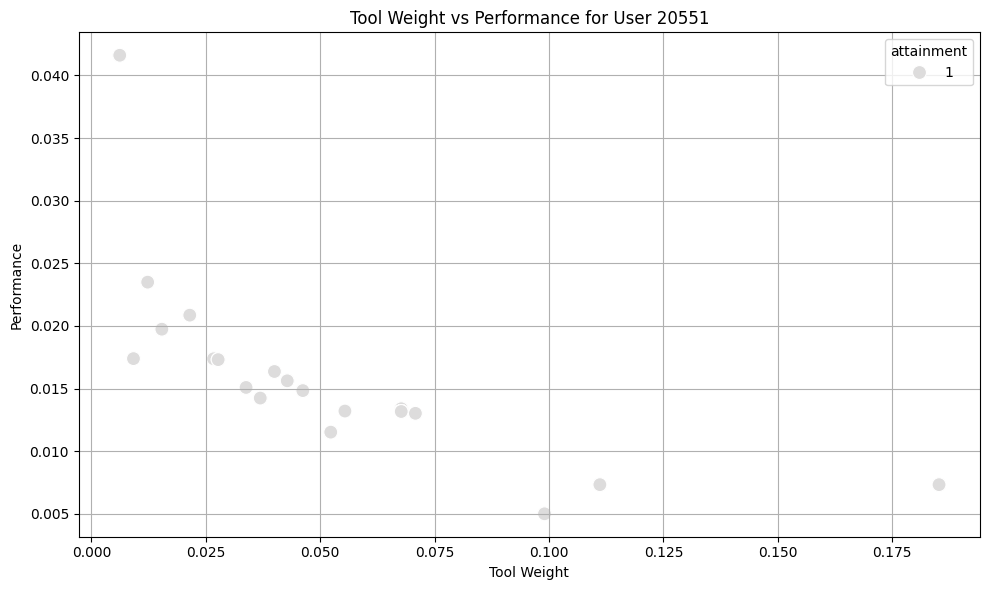

Visualizing learning path for User 21041


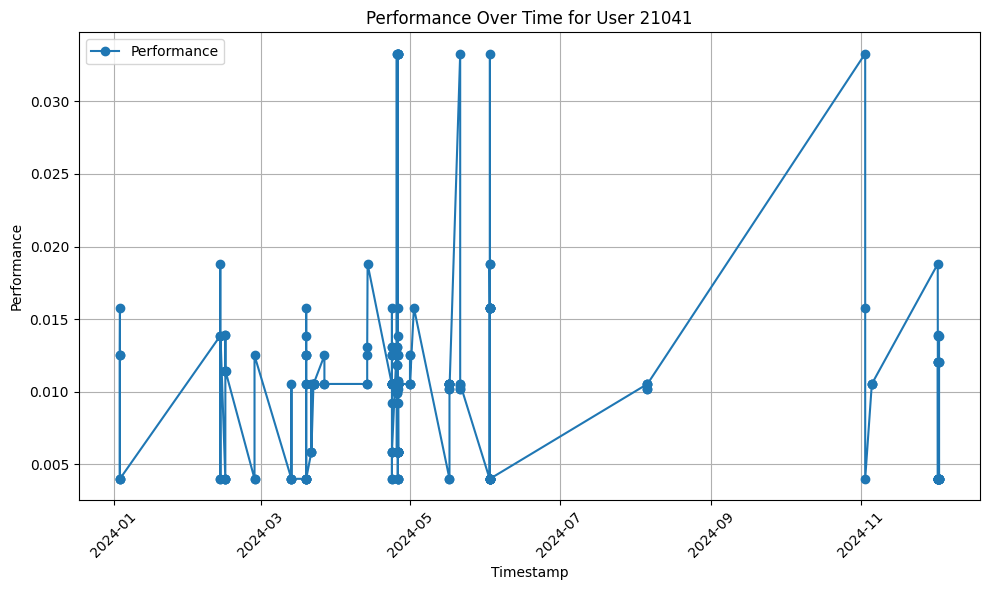

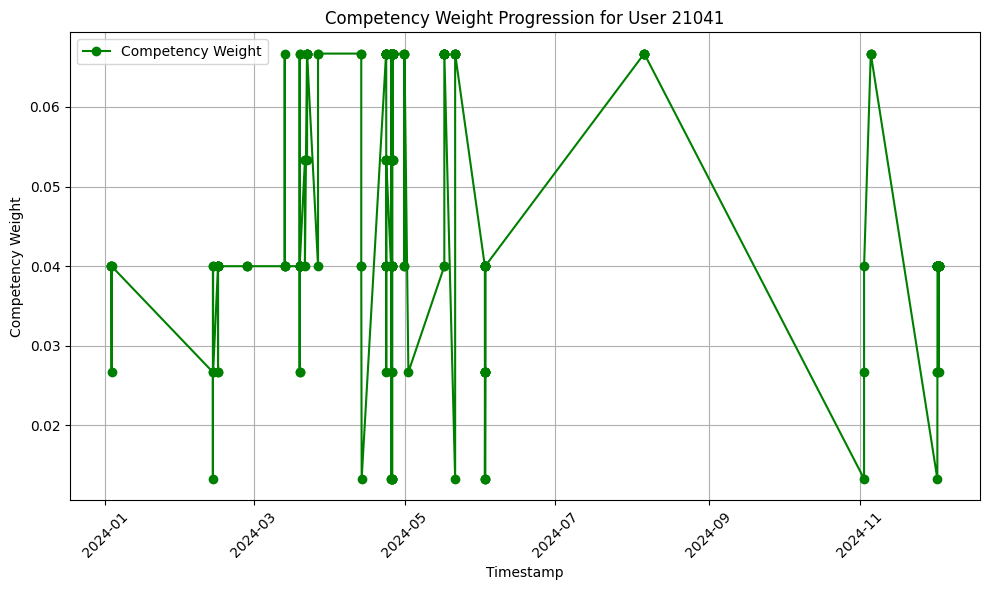

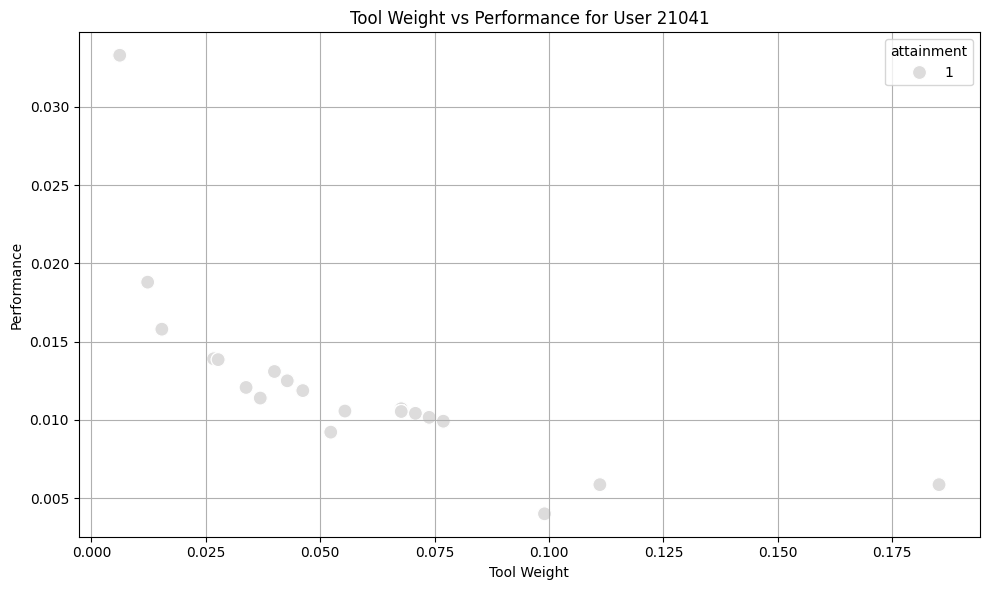

Visualizing learning path for User 23301


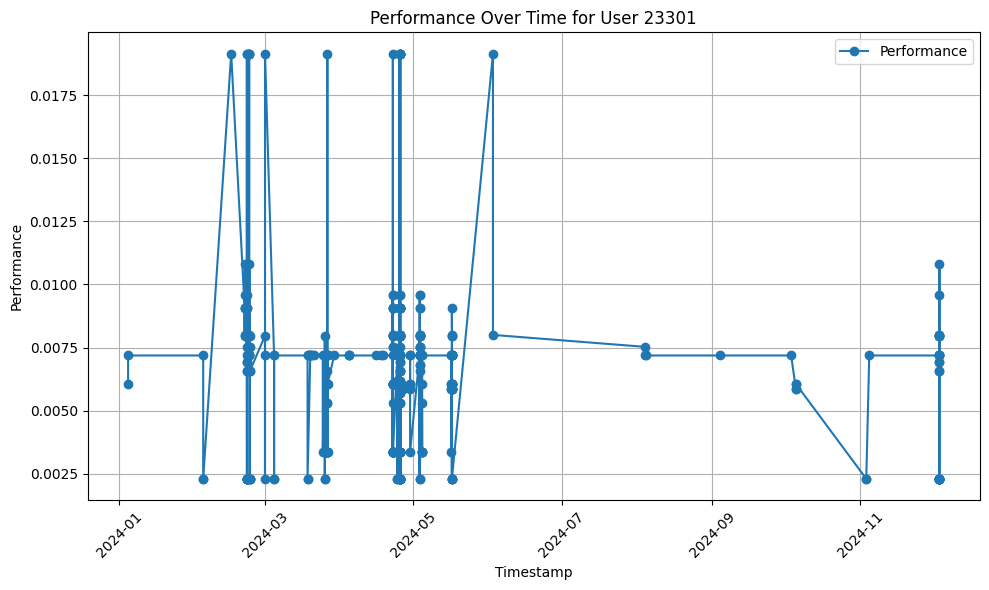

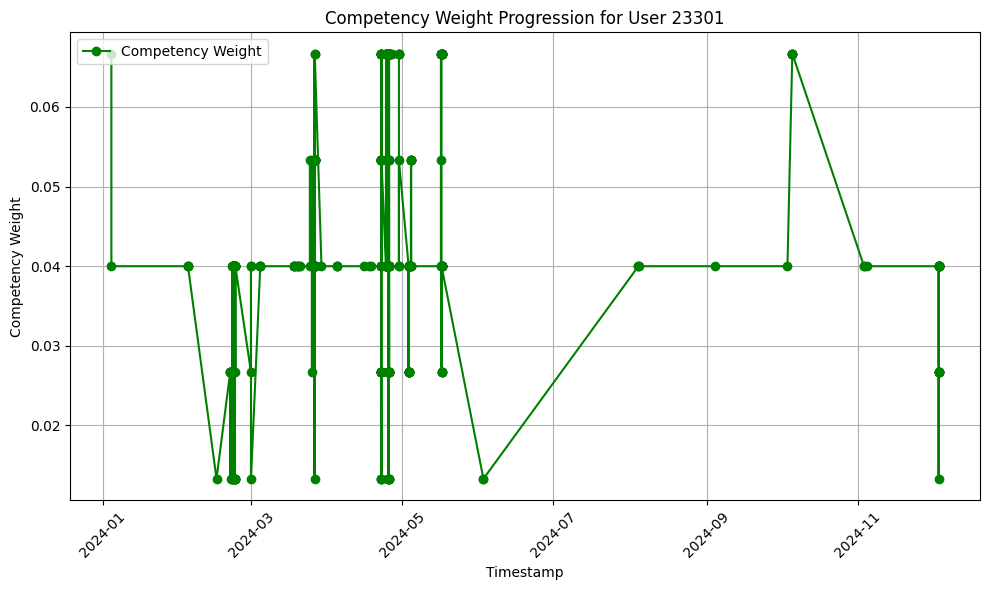

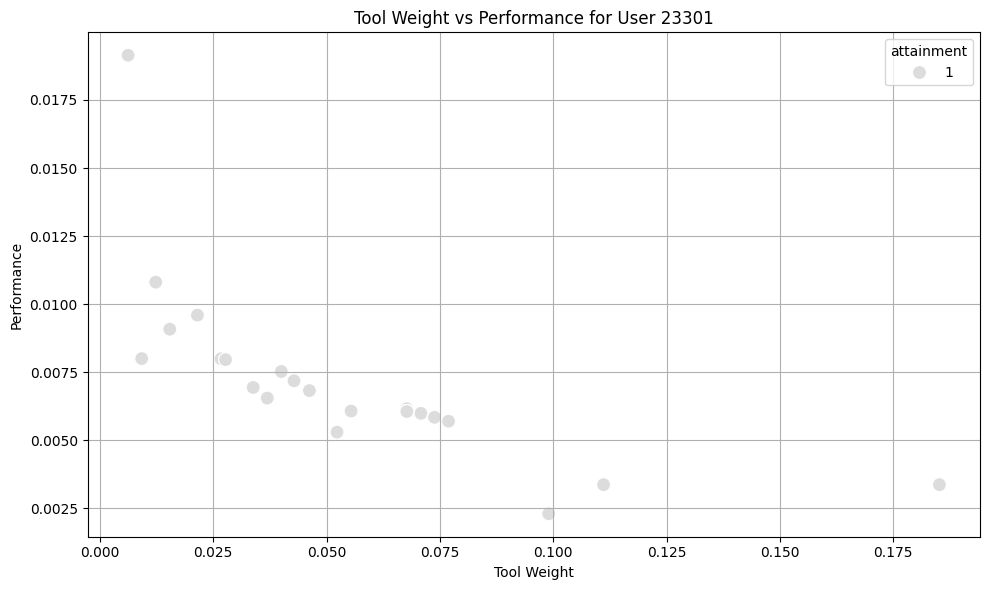

Visualizing learning path for User 23320


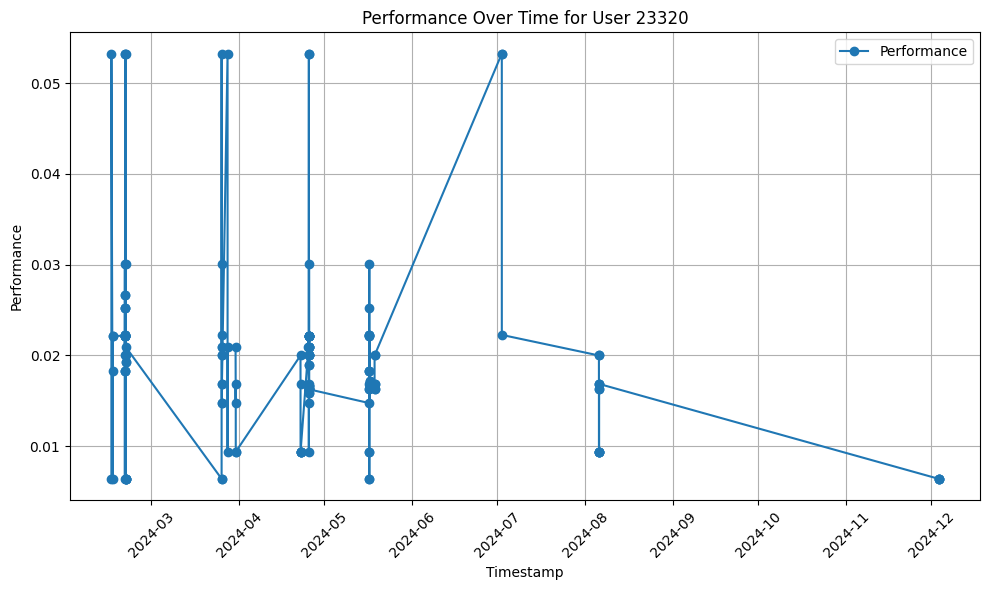

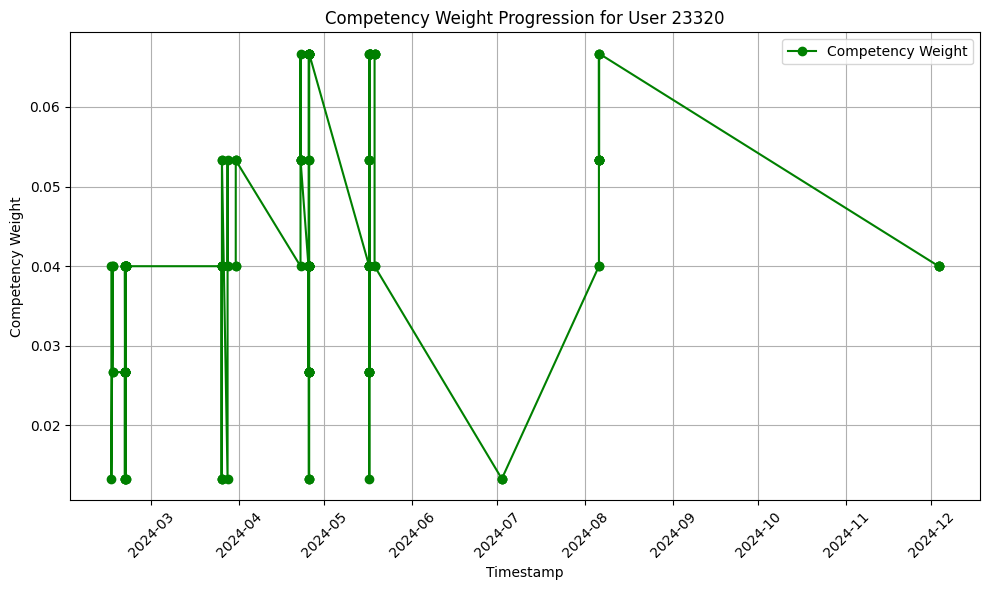

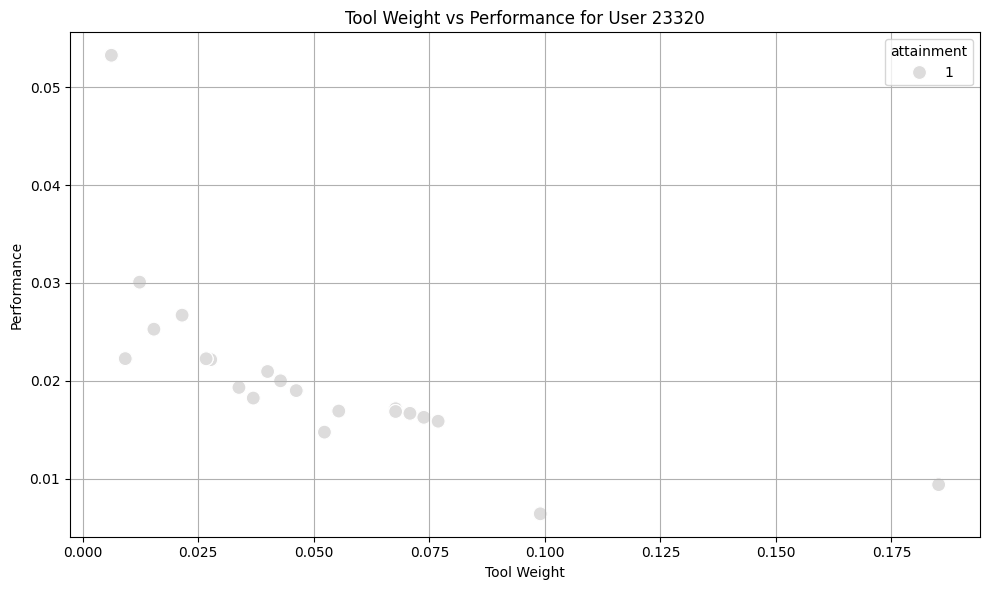

Visualizing learning path for User 23349


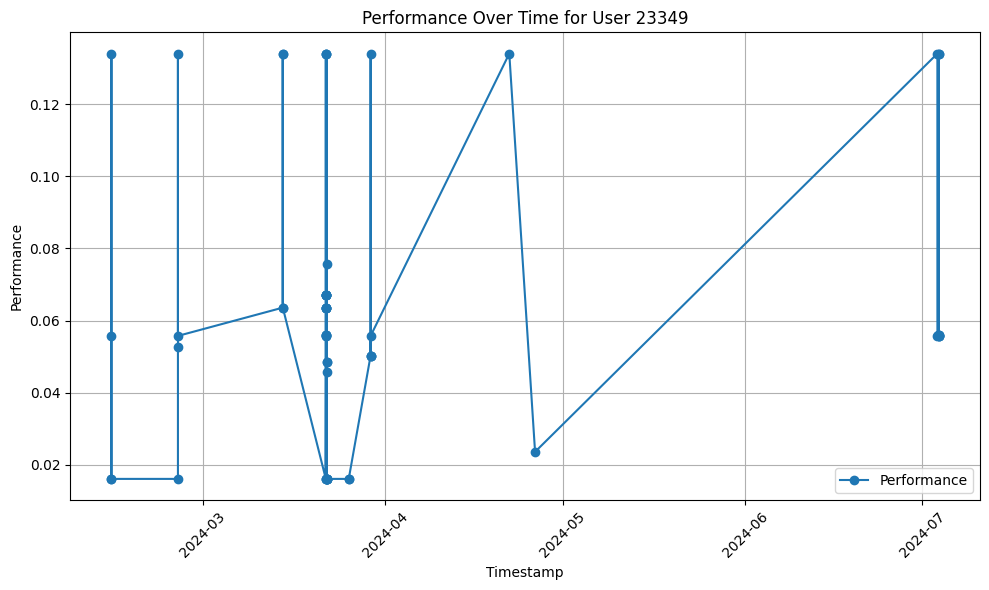

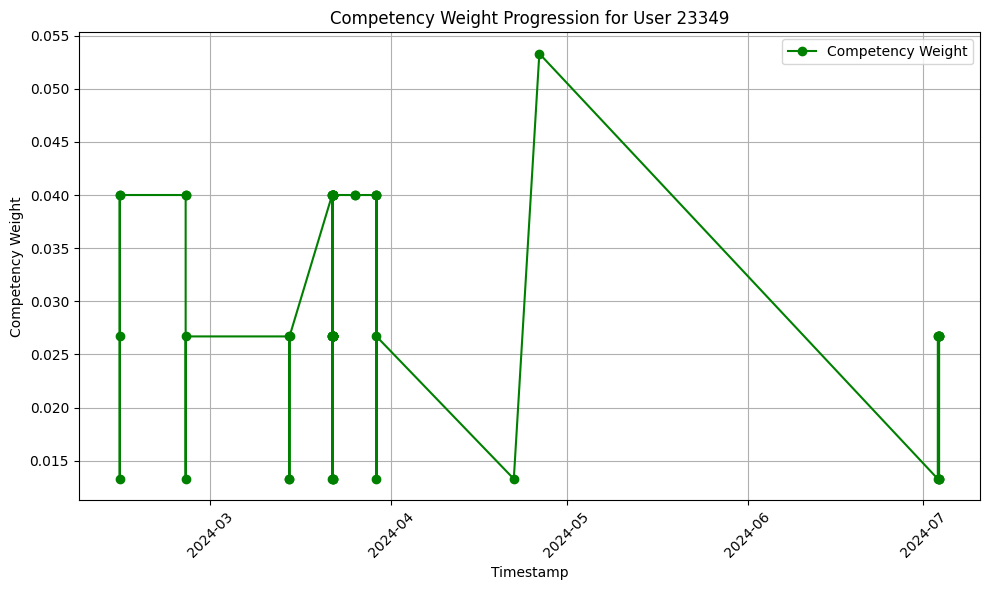

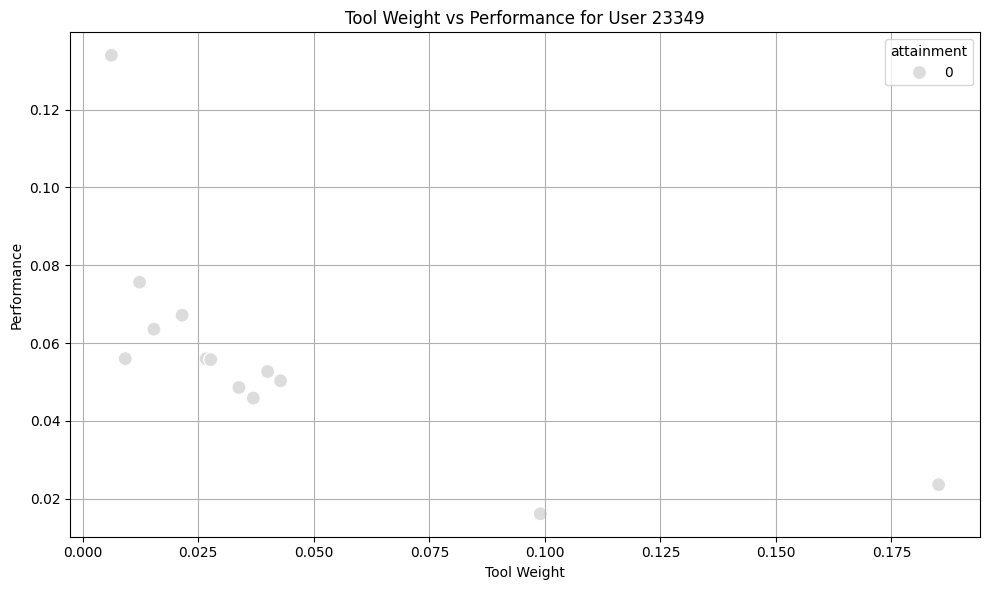

Visualizing learning path for User 23356


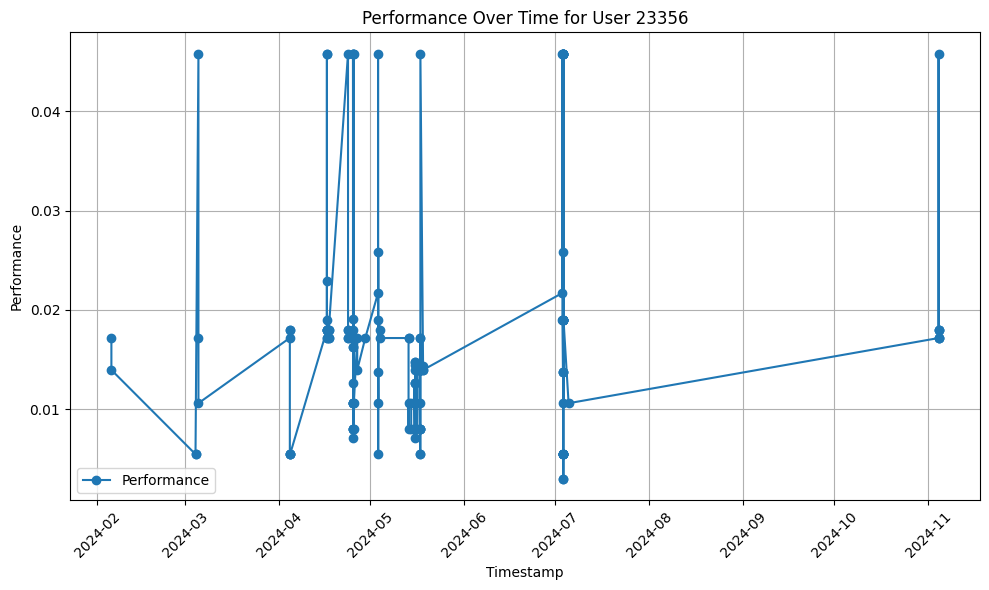

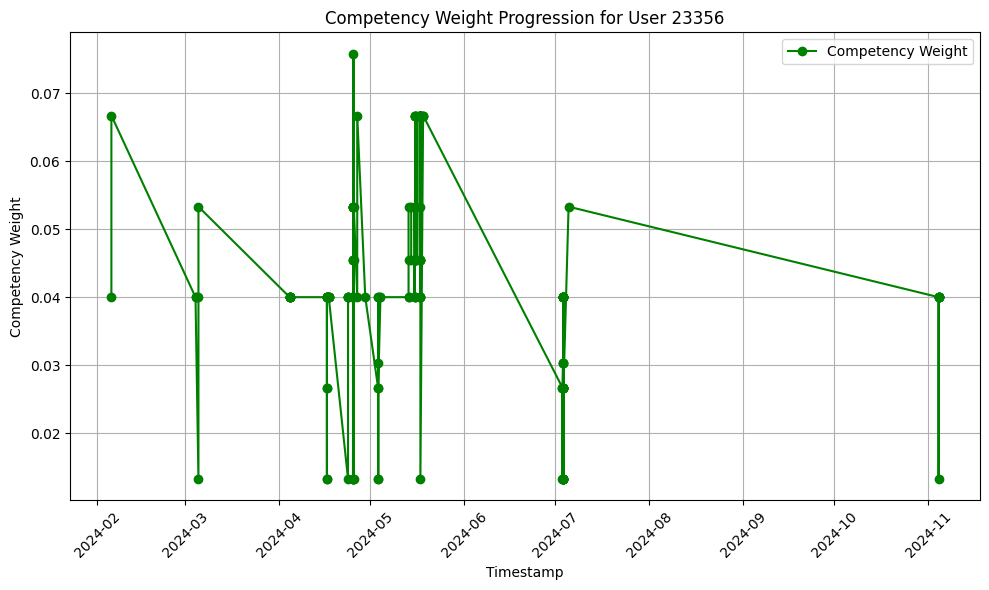

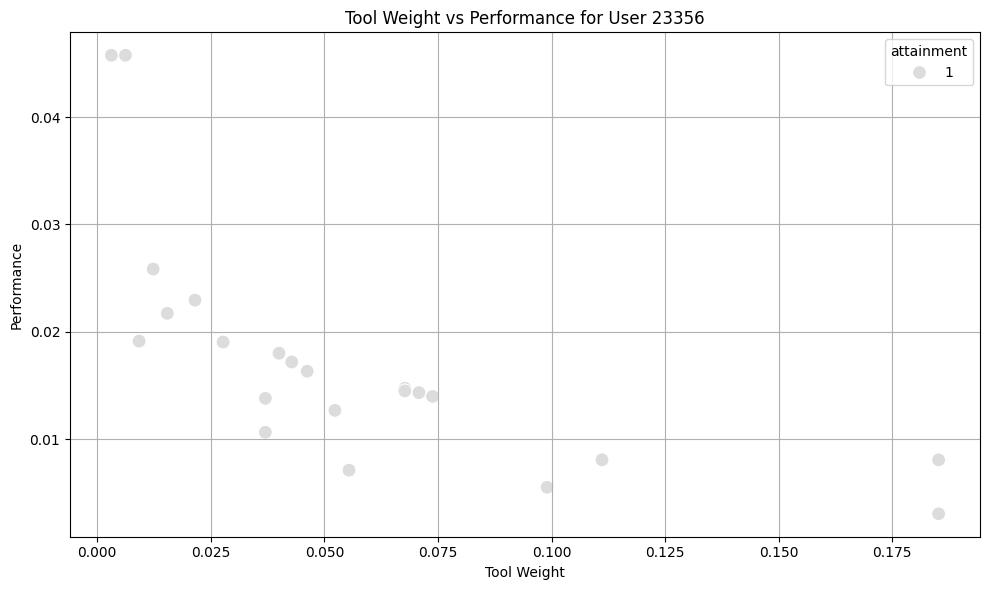

Visualizing learning path for User 23396


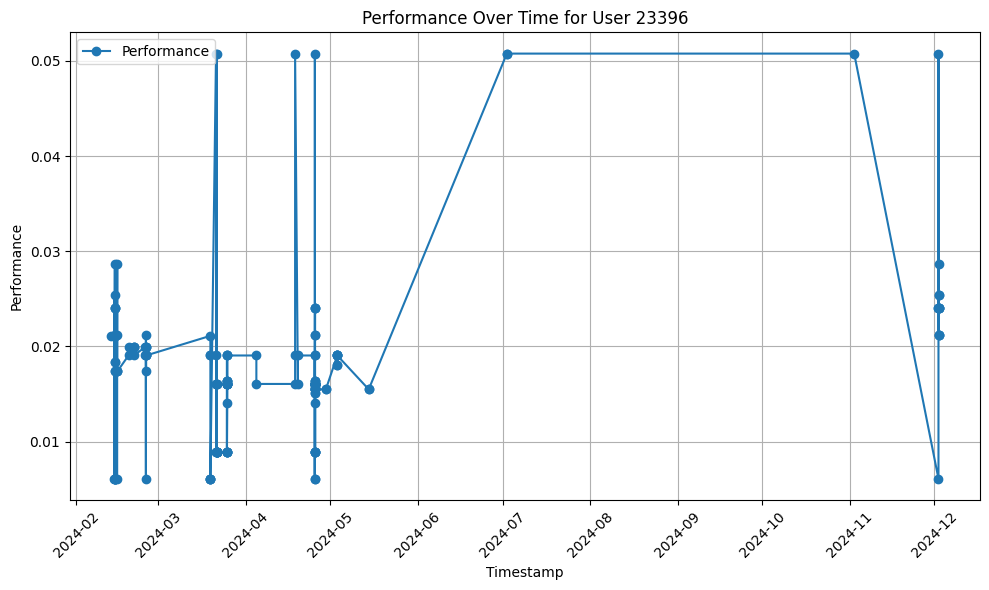

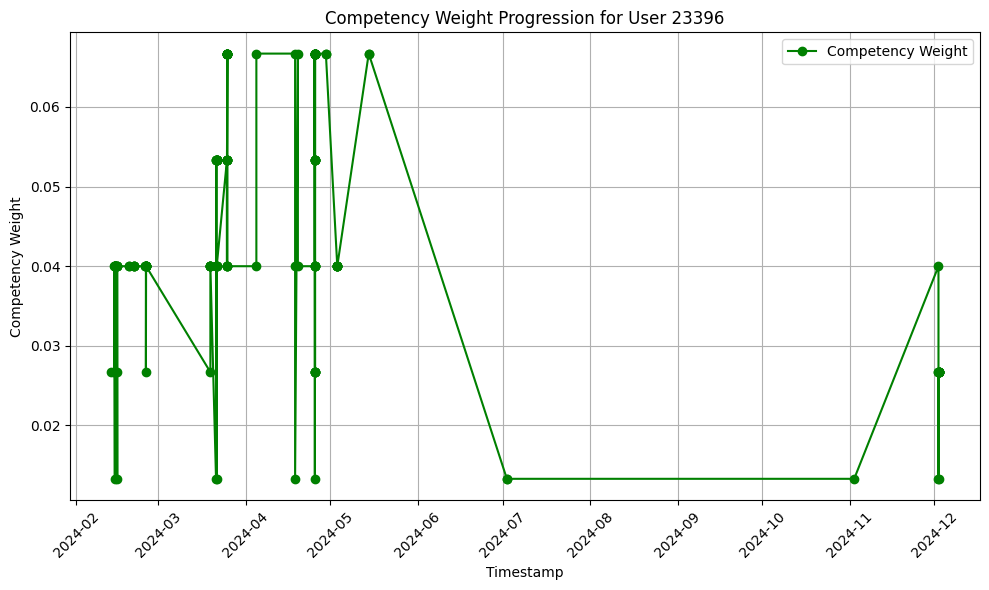

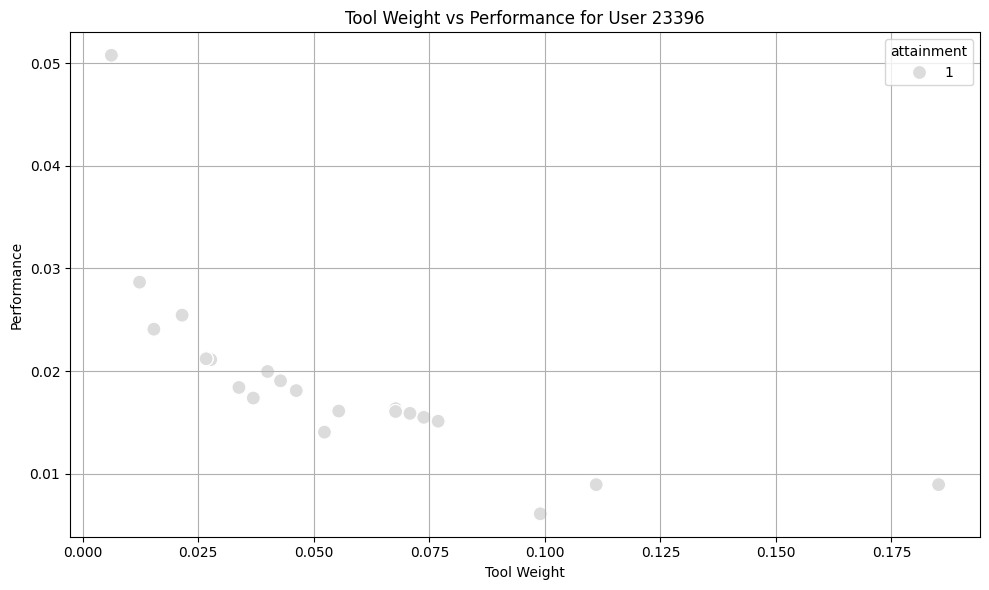

Visualizing learning path for User 23706


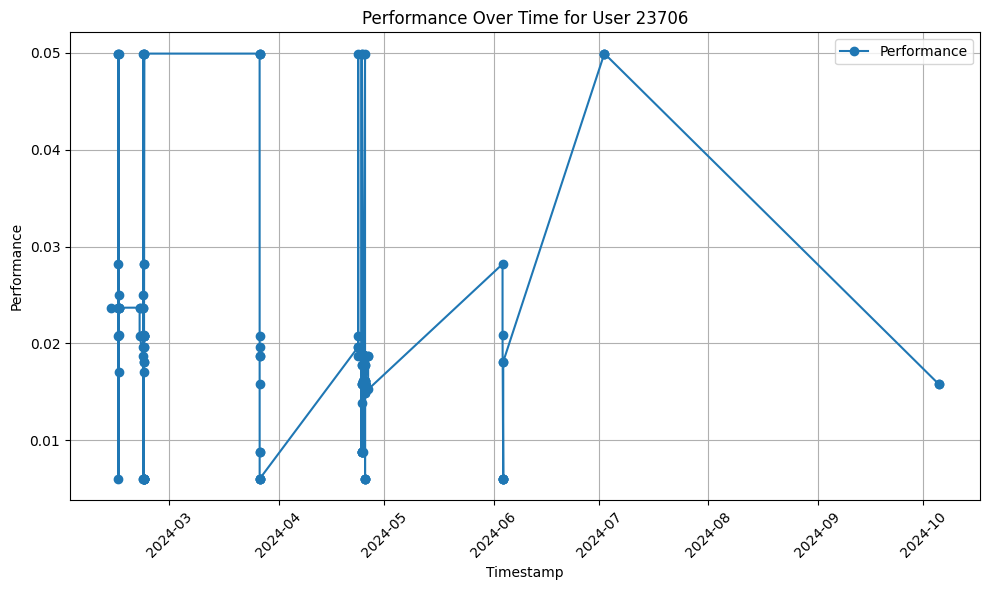

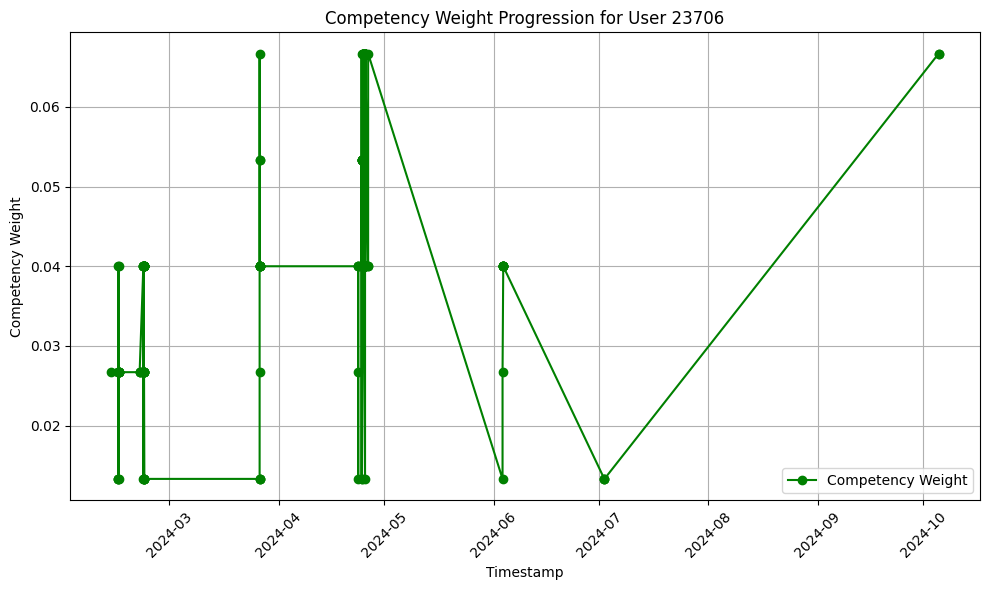

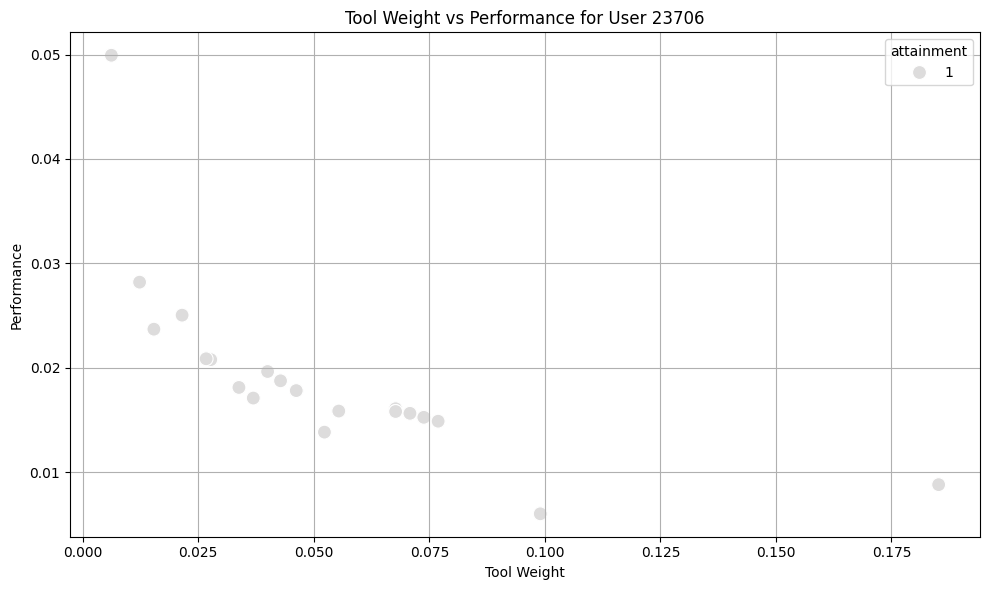

Visualizing learning path for User 23725


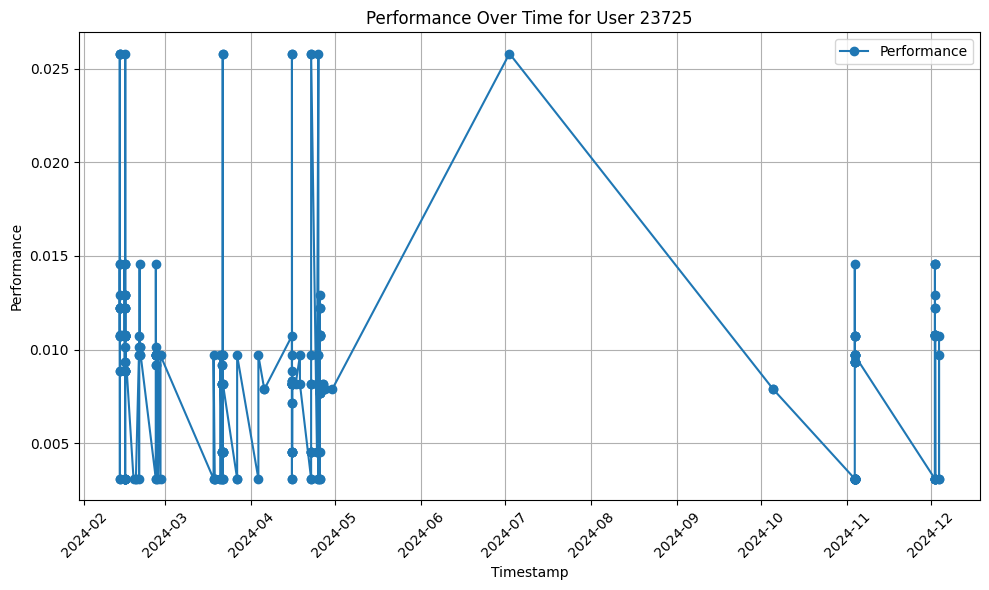

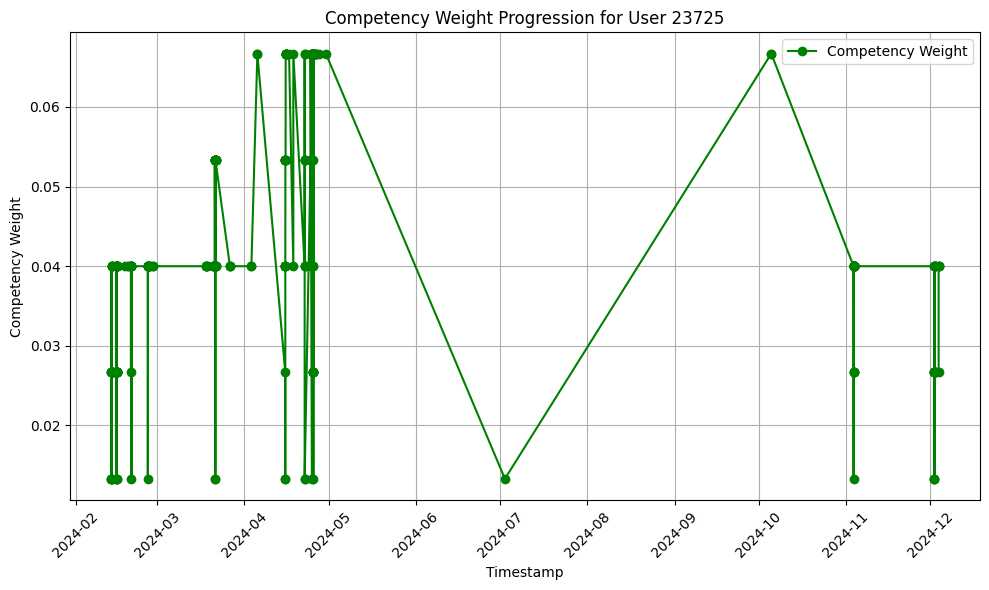

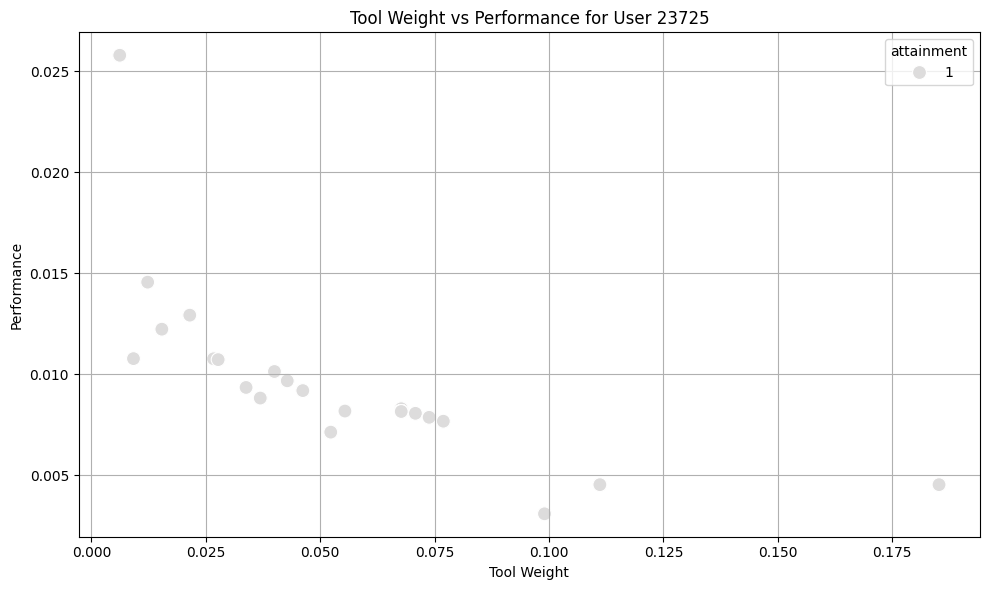

Visualizing learning path for User 23791


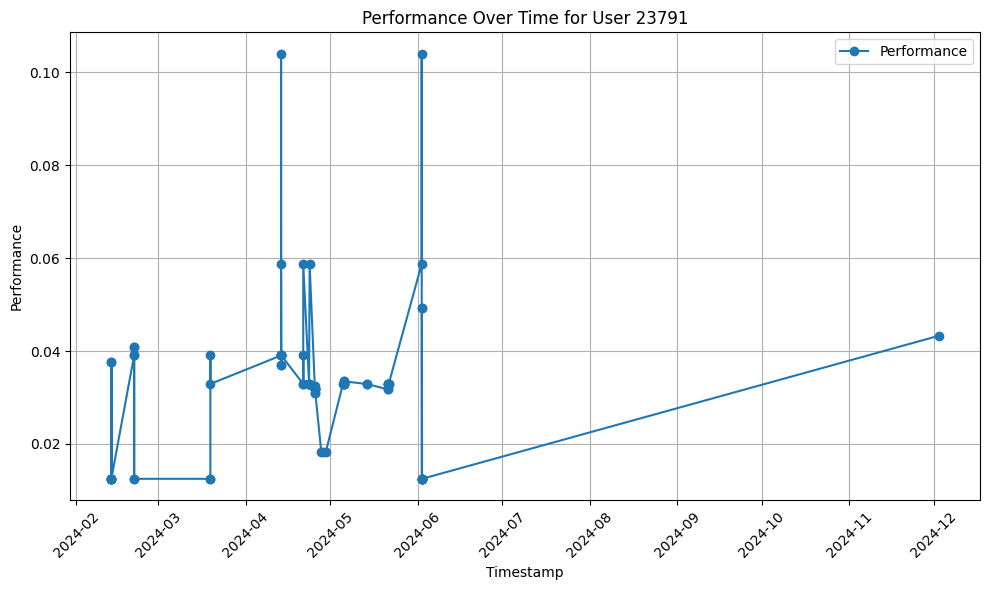

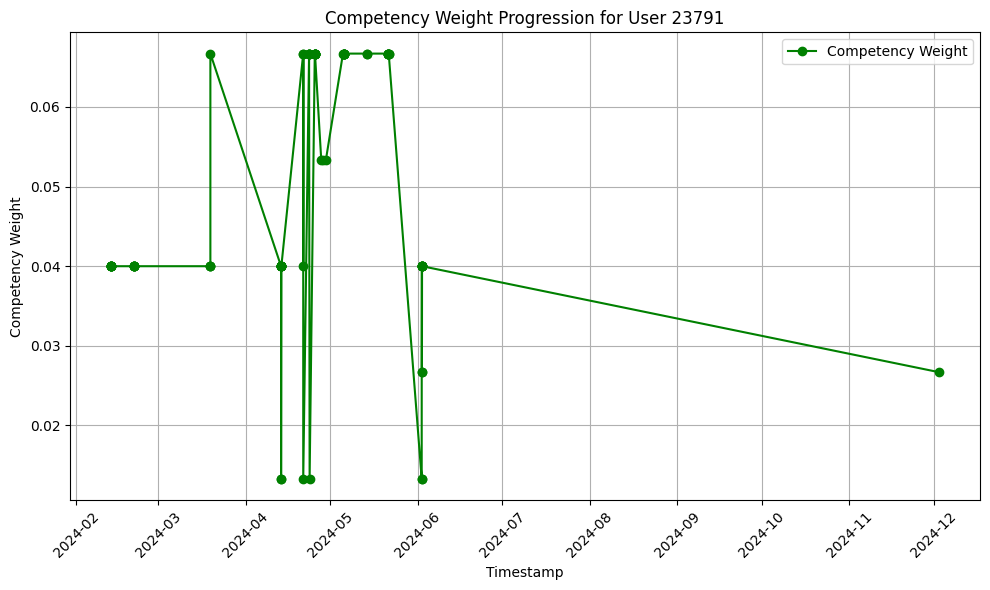

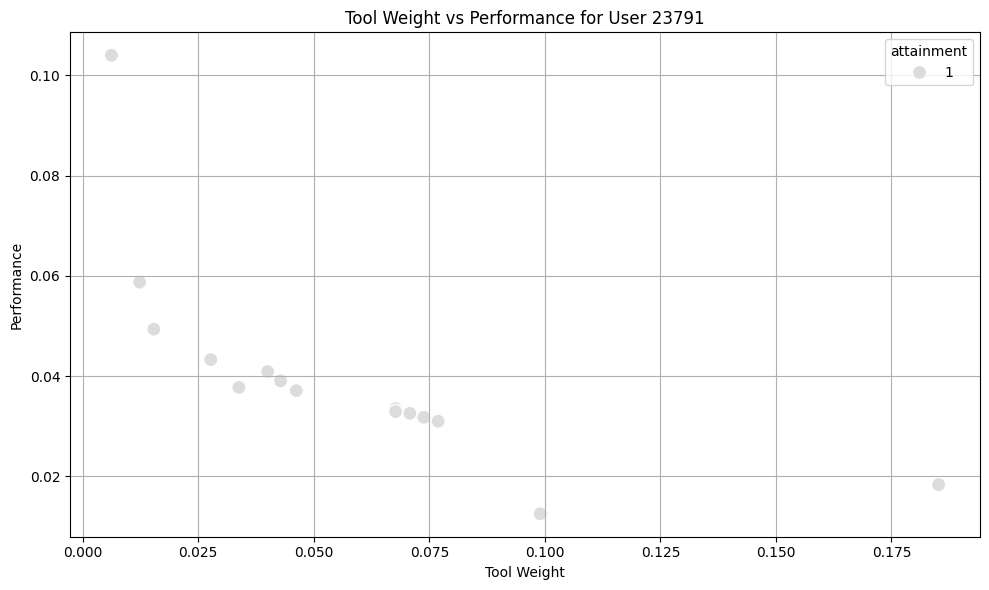

Visualizing learning path for User 23967


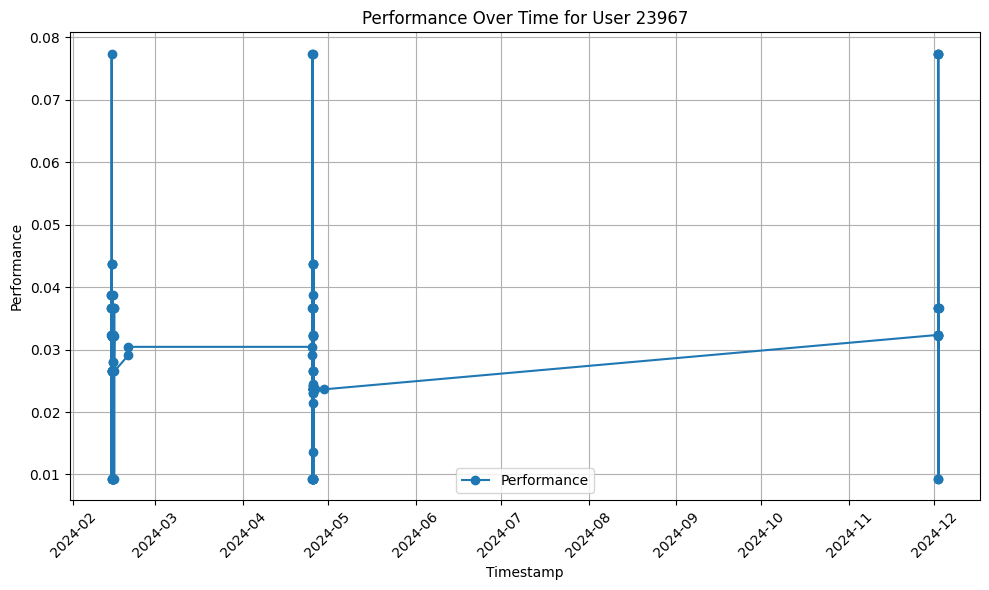

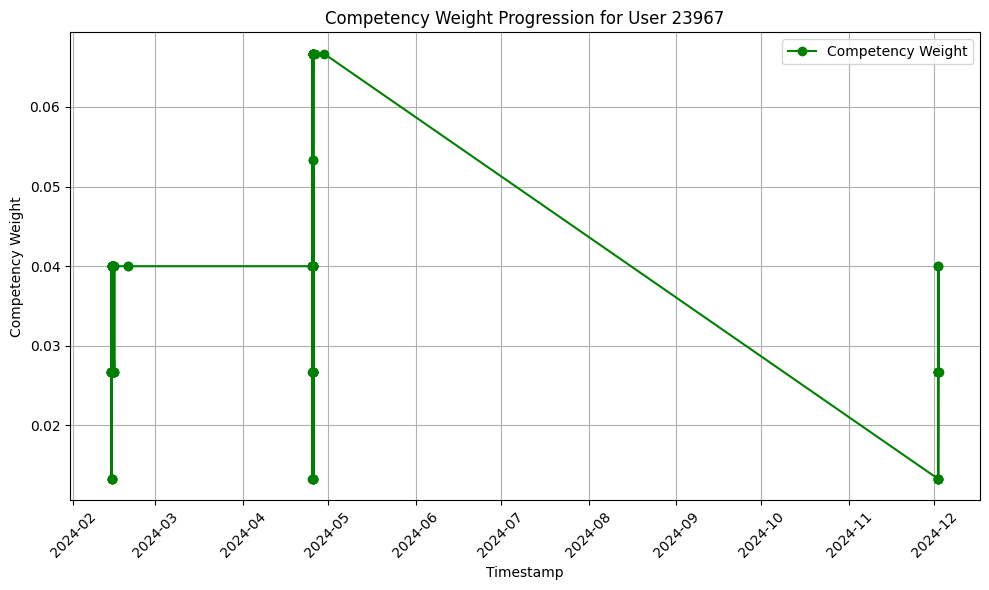

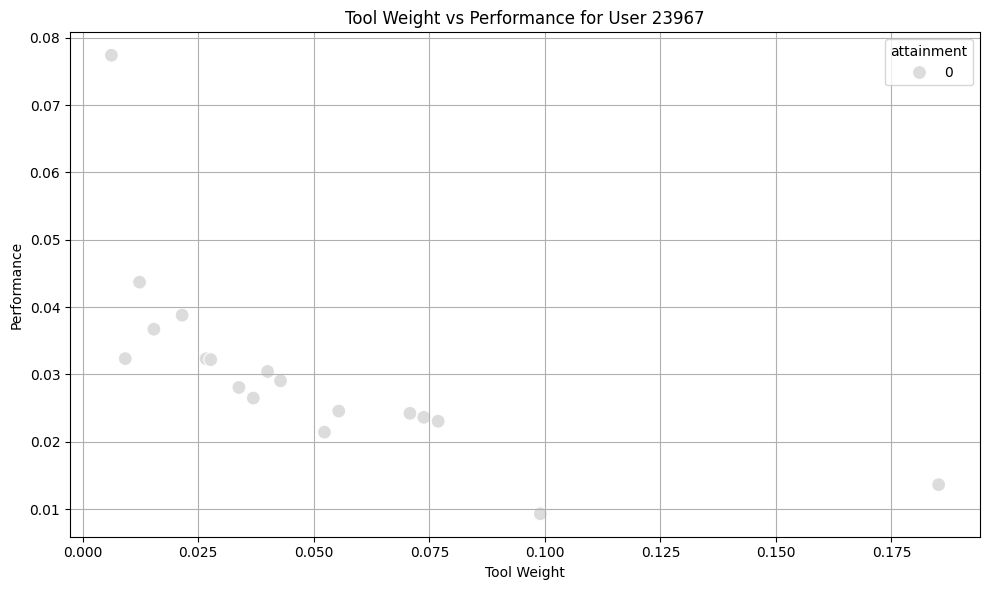

Visualizing learning path for User 26342


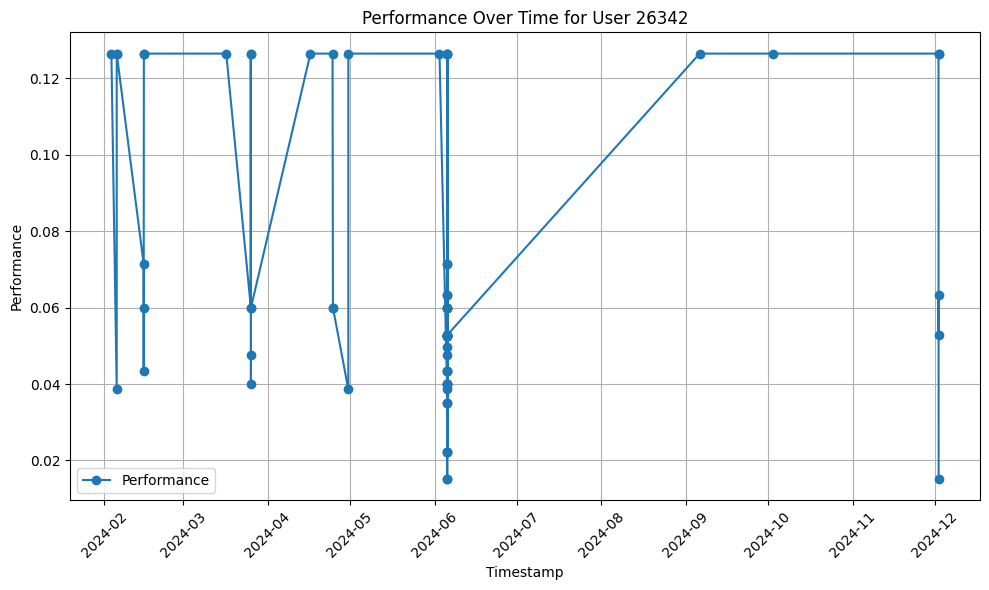

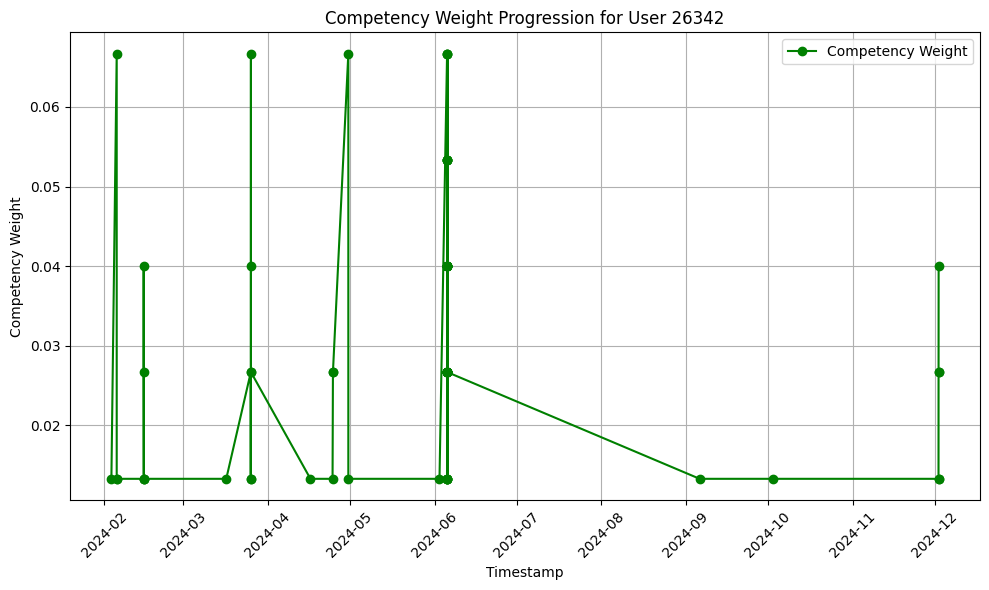

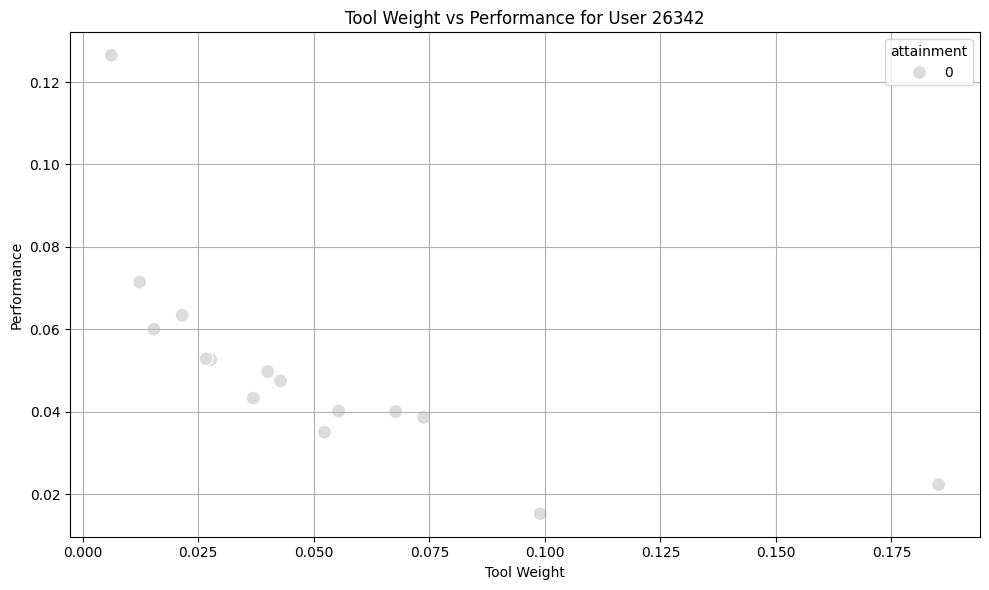

Visualizing learning path for User 26393


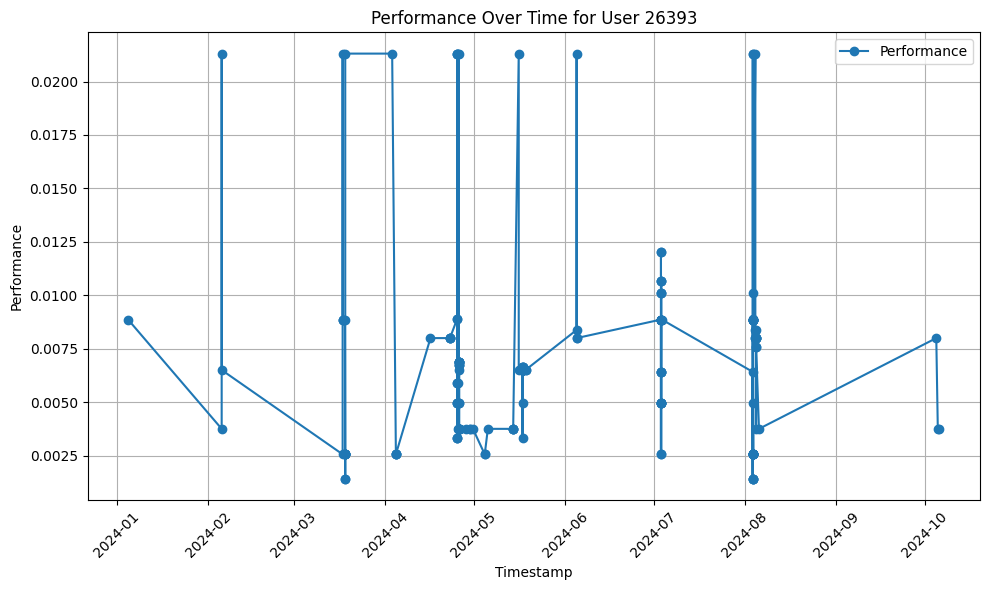

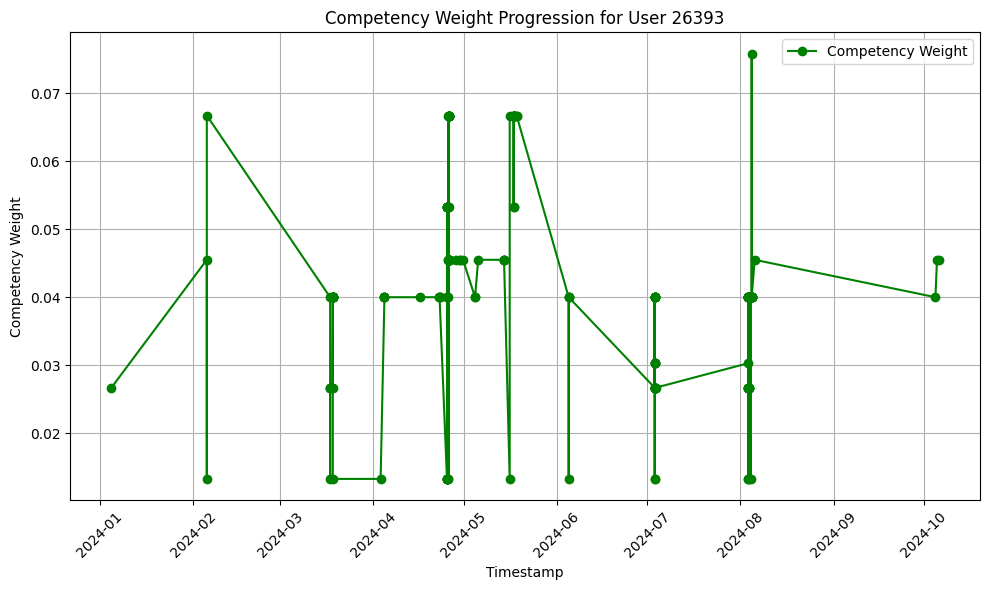

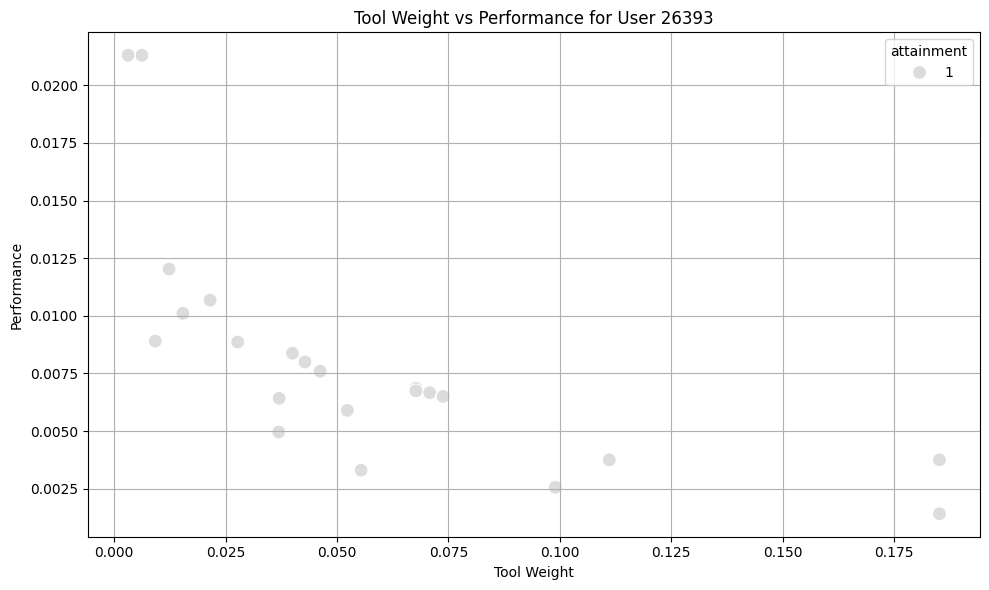

Visualizing learning path for User 26430


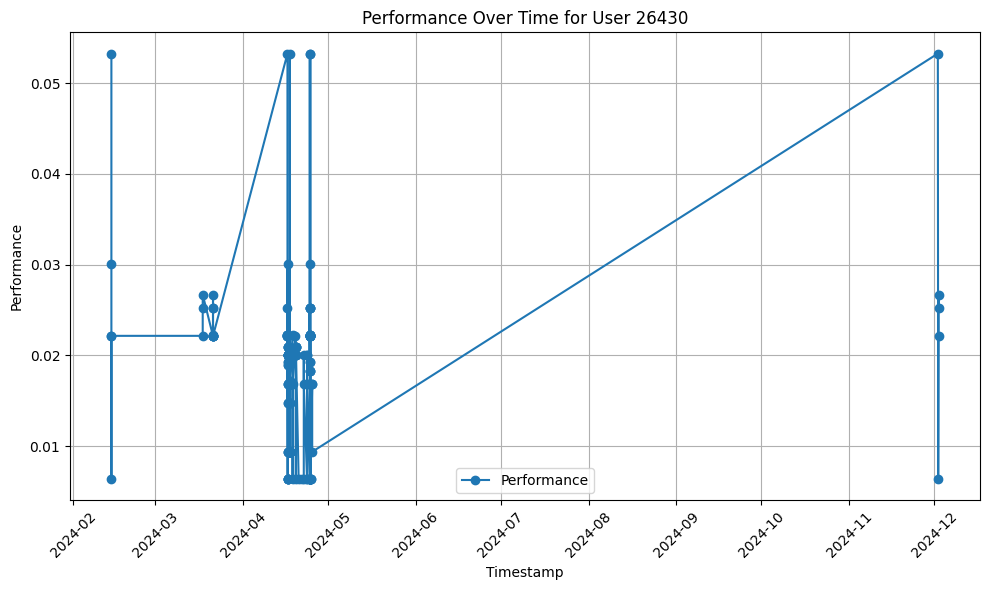

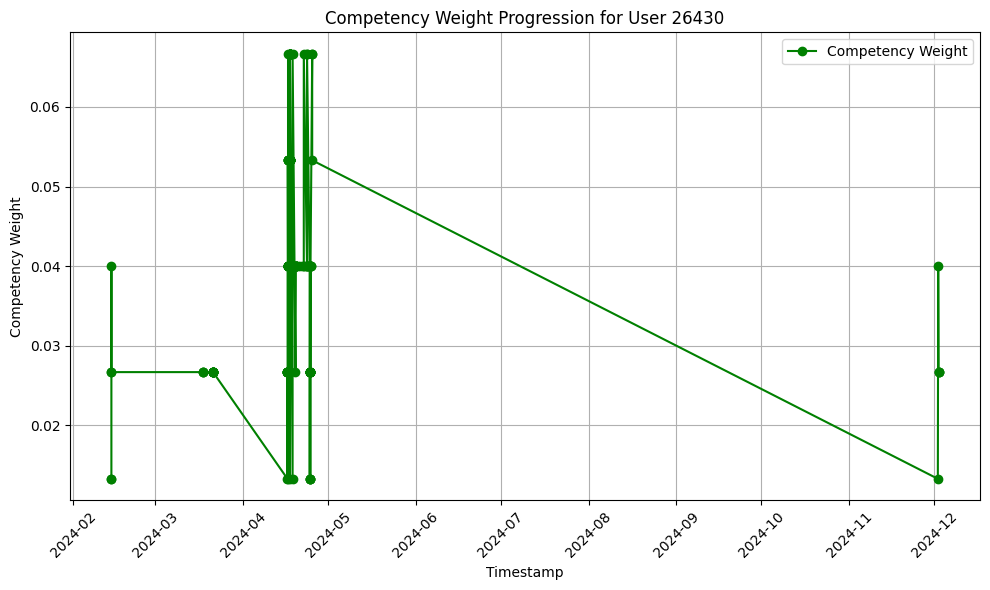

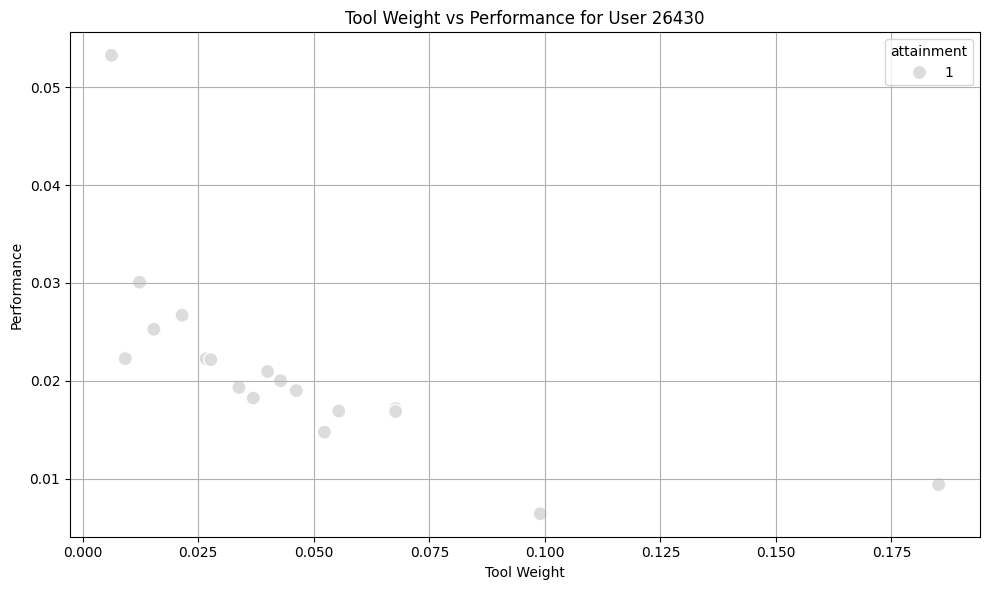

Visualizing learning path for User 26437


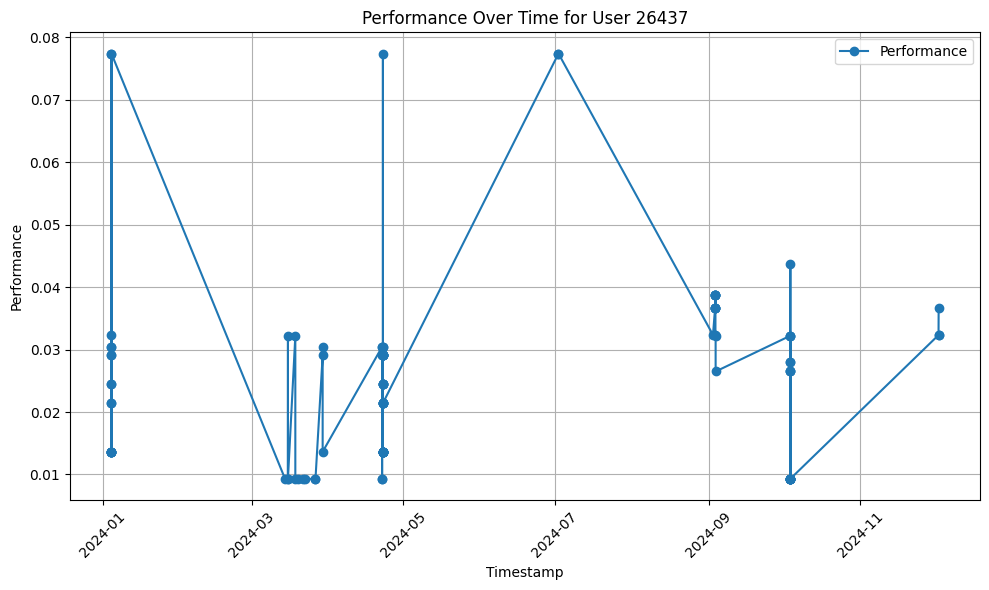

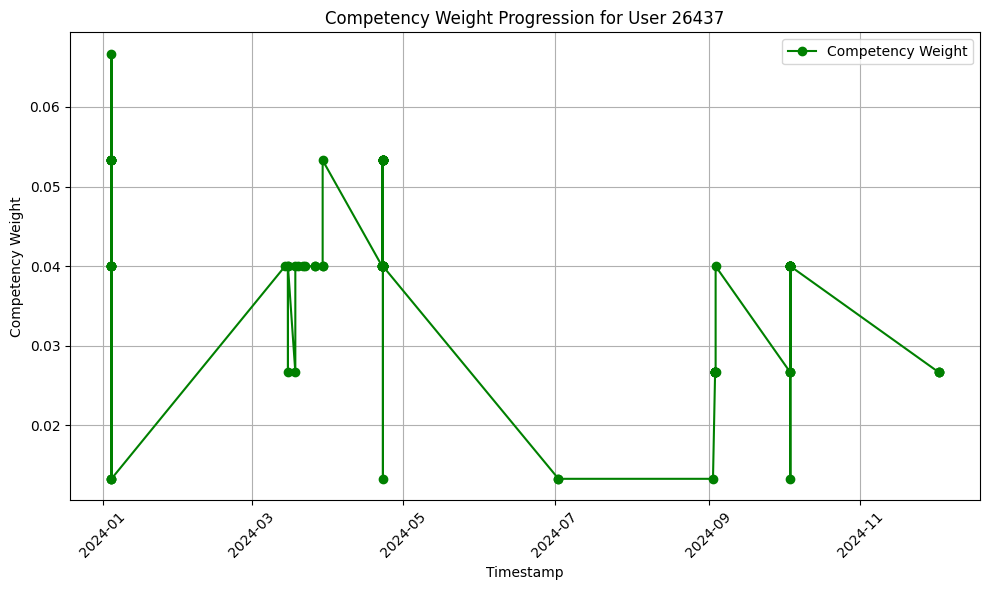

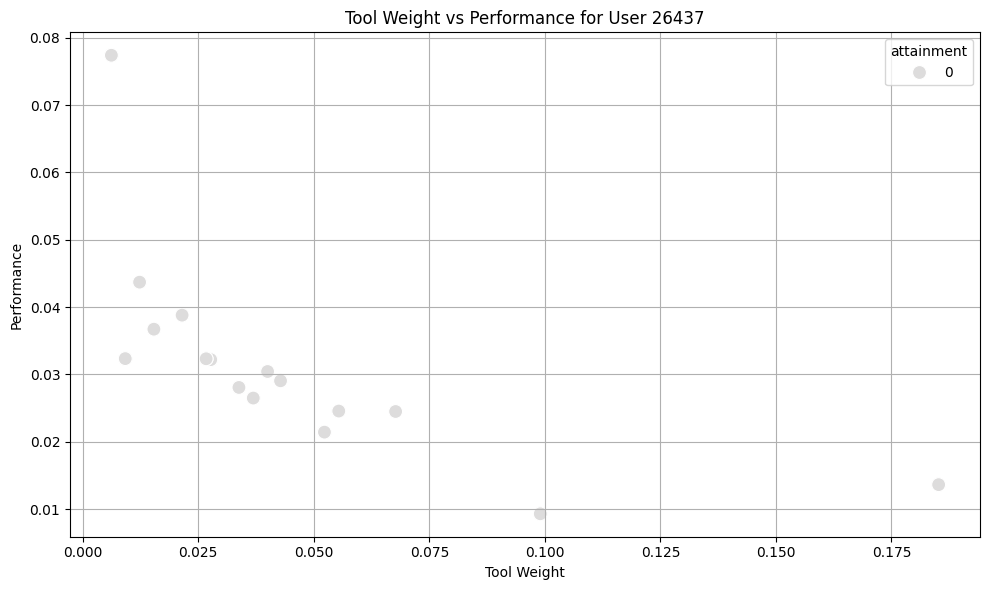

Visualizing learning path for User 26493


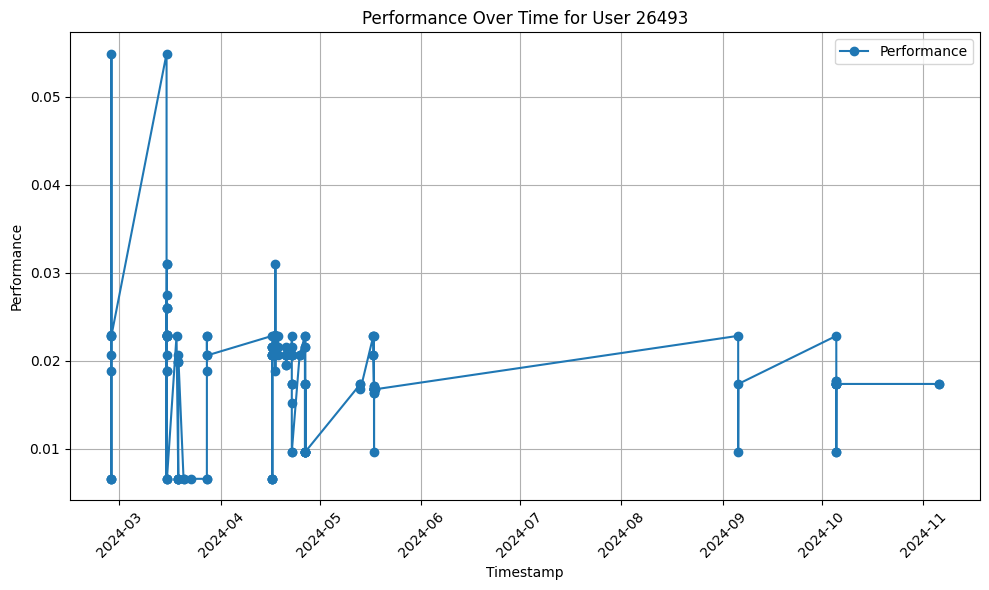

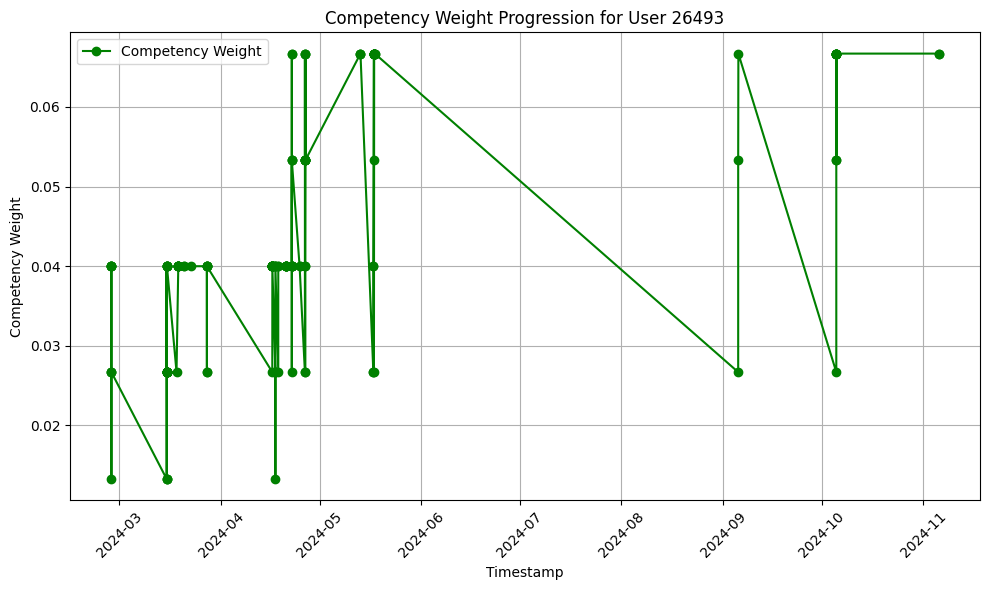

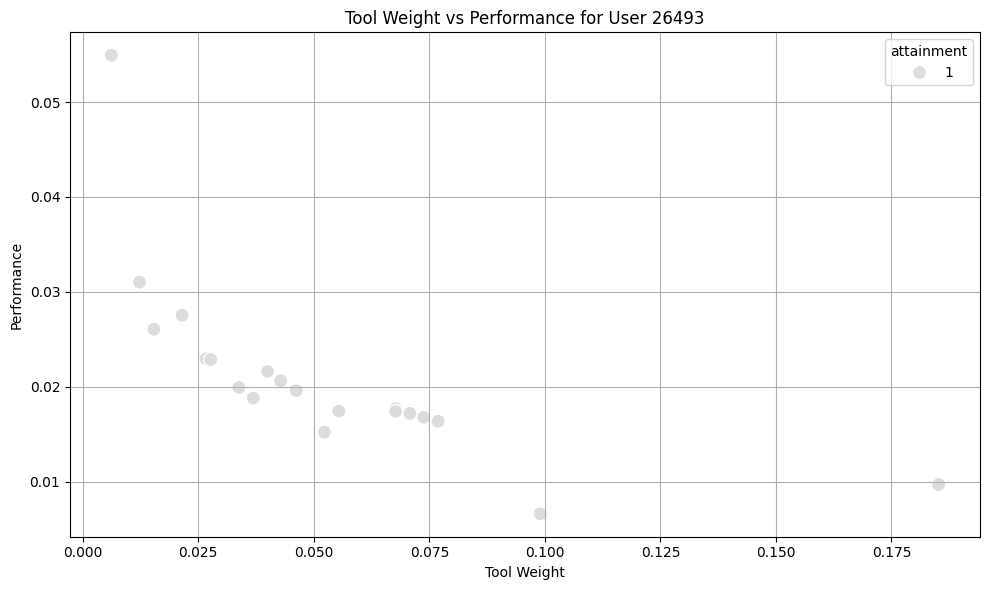

Visualizing learning path for User 26502


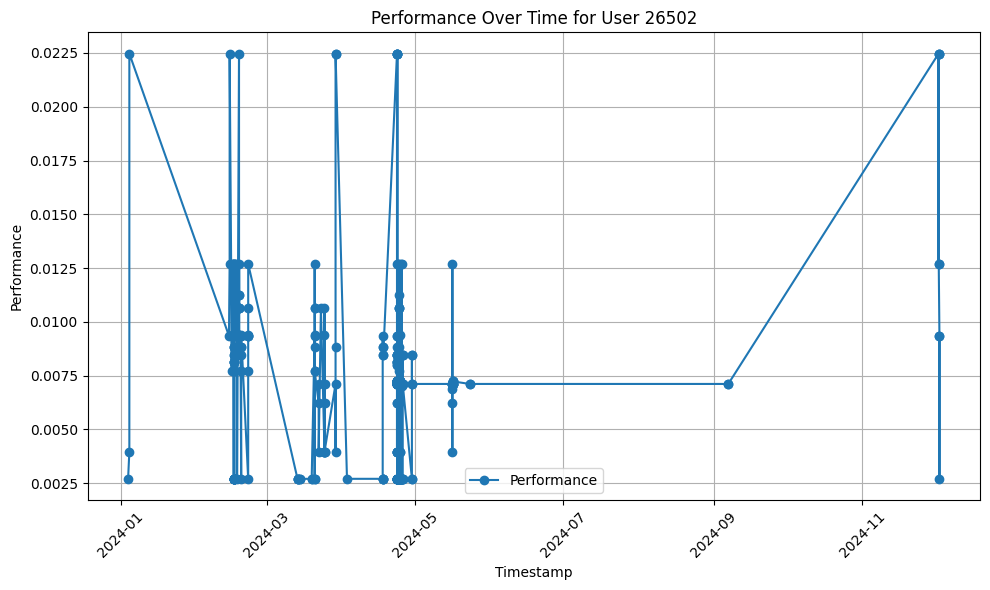

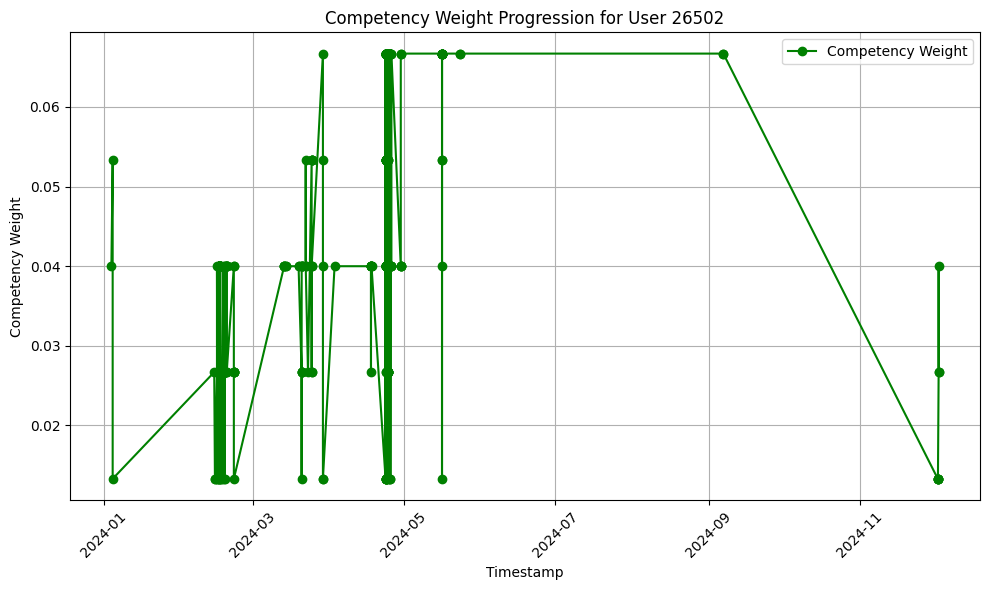

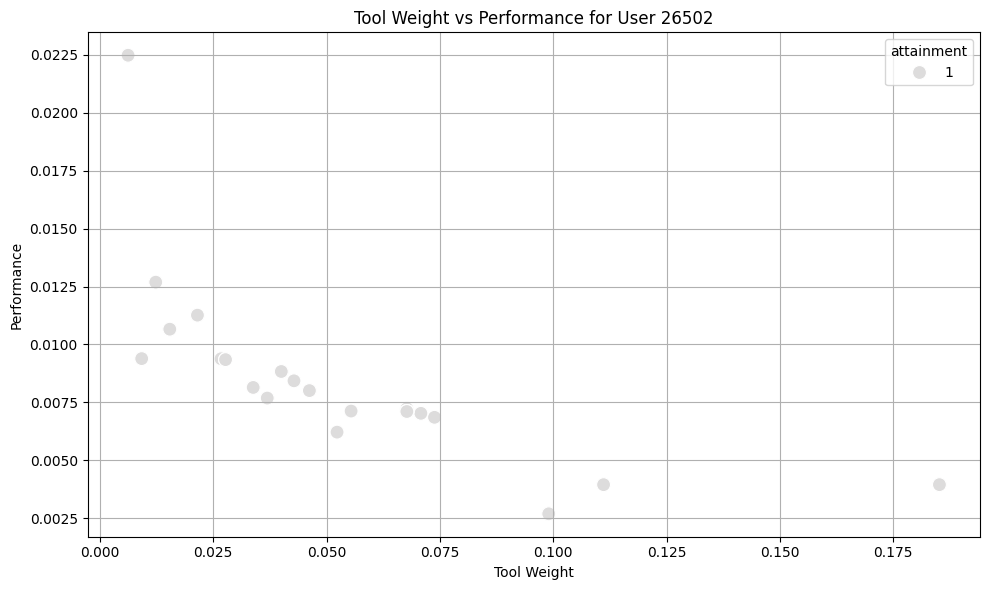

Visualizing learning path for User 26603


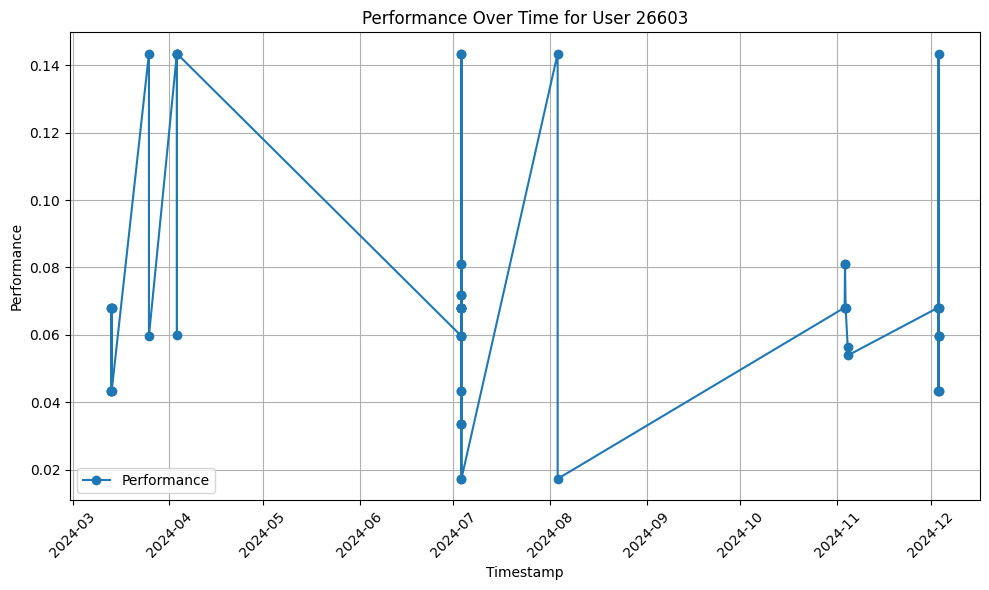

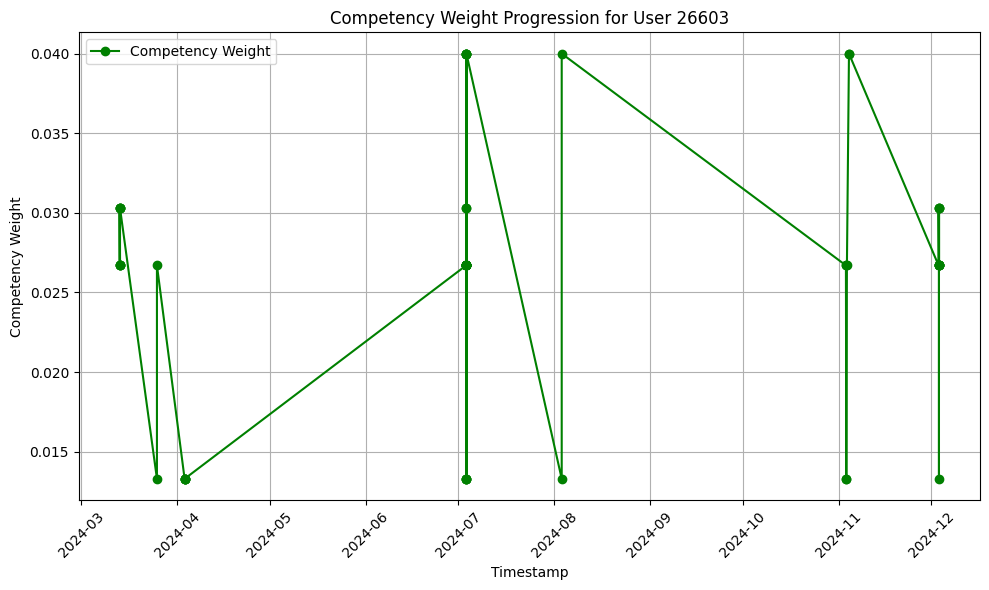

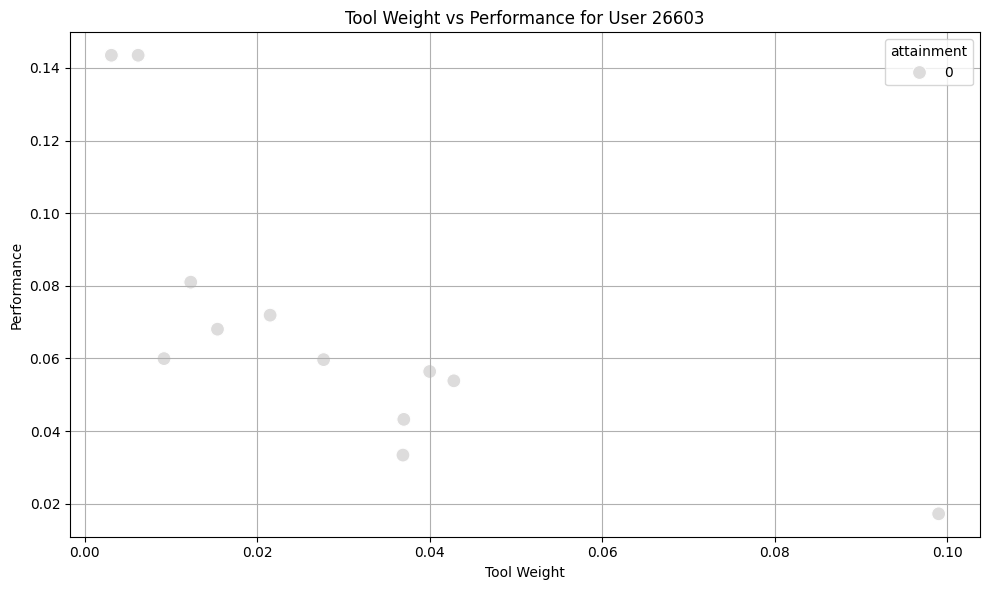

Visualizing learning path for User 26646


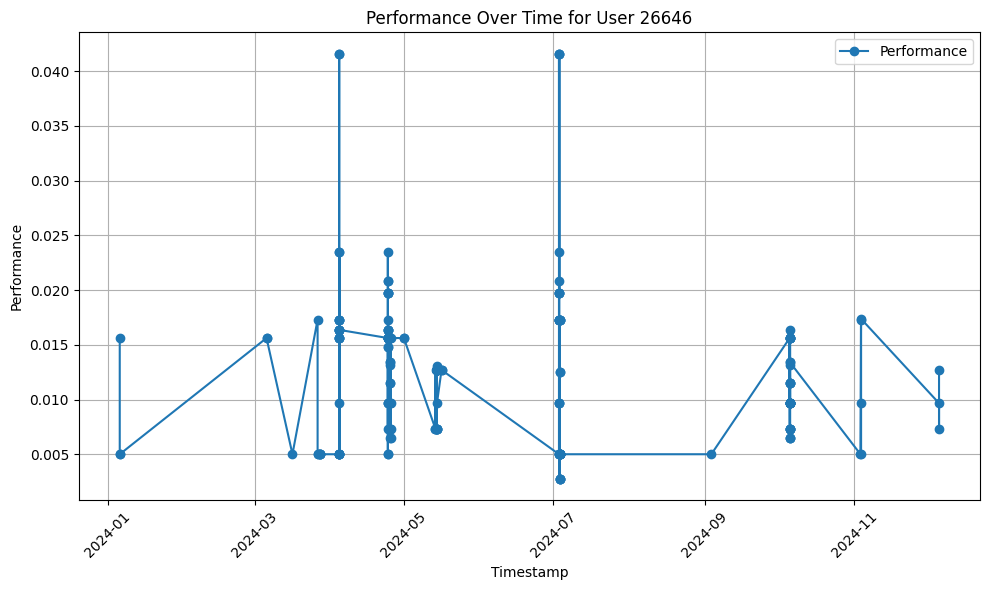

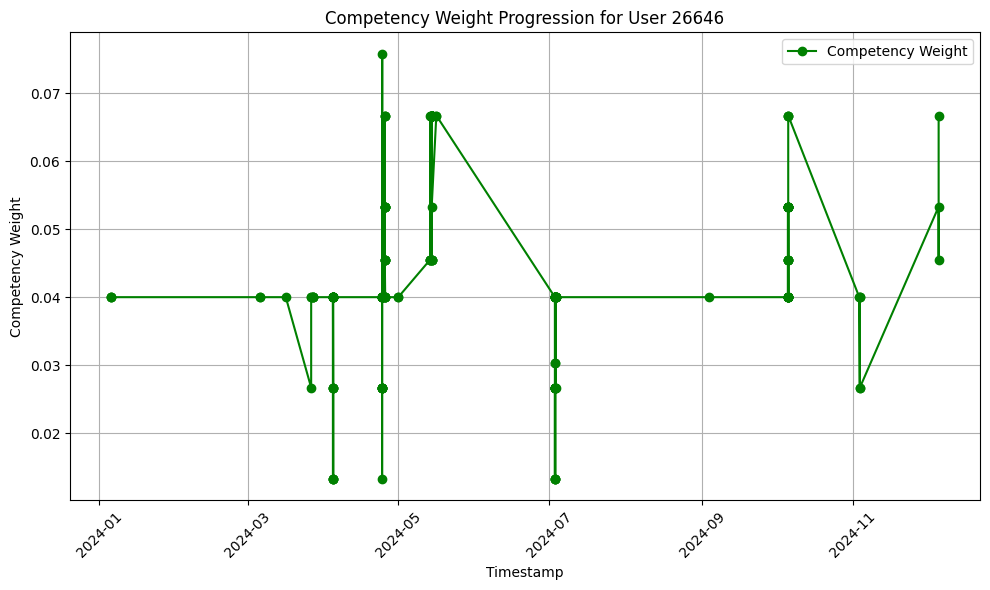

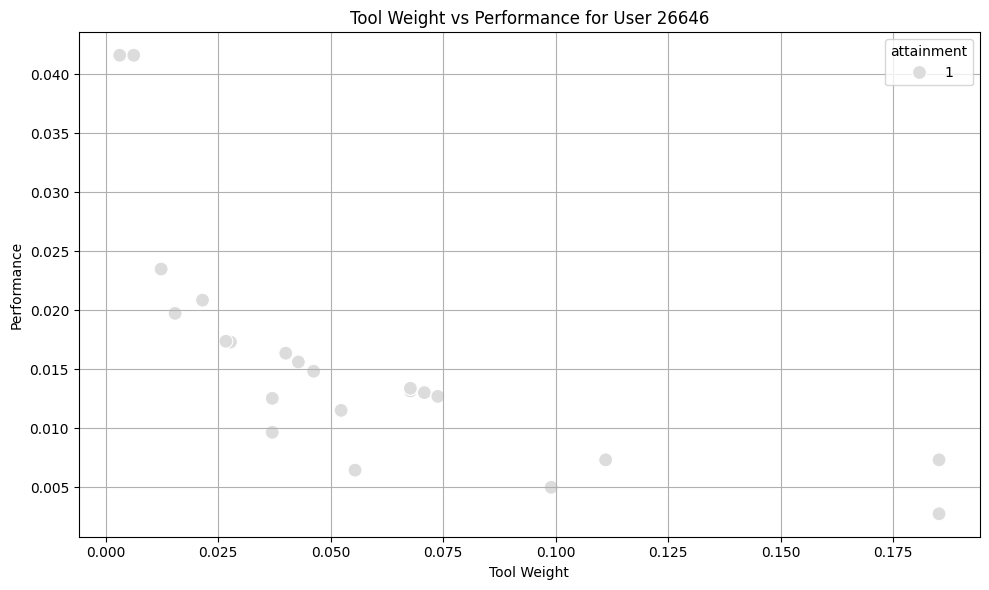

Visualizing learning path for User 26738


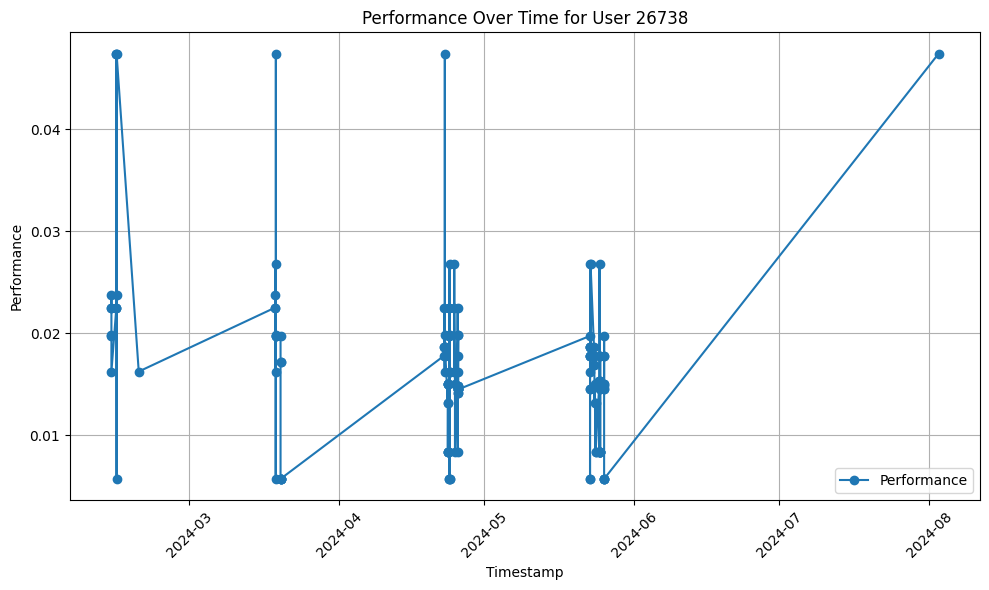

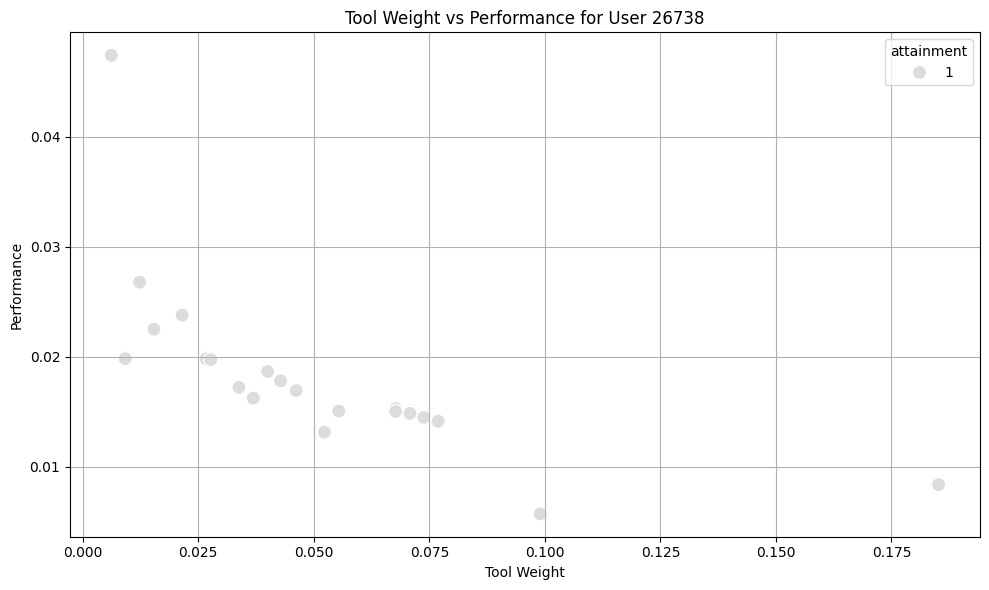

Visualizing learning path for User 26740


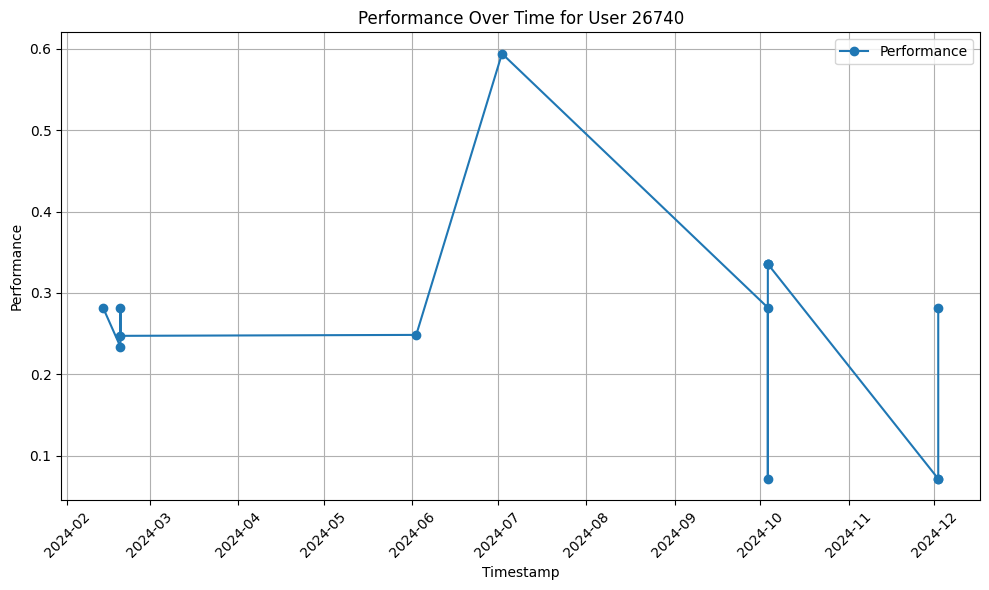

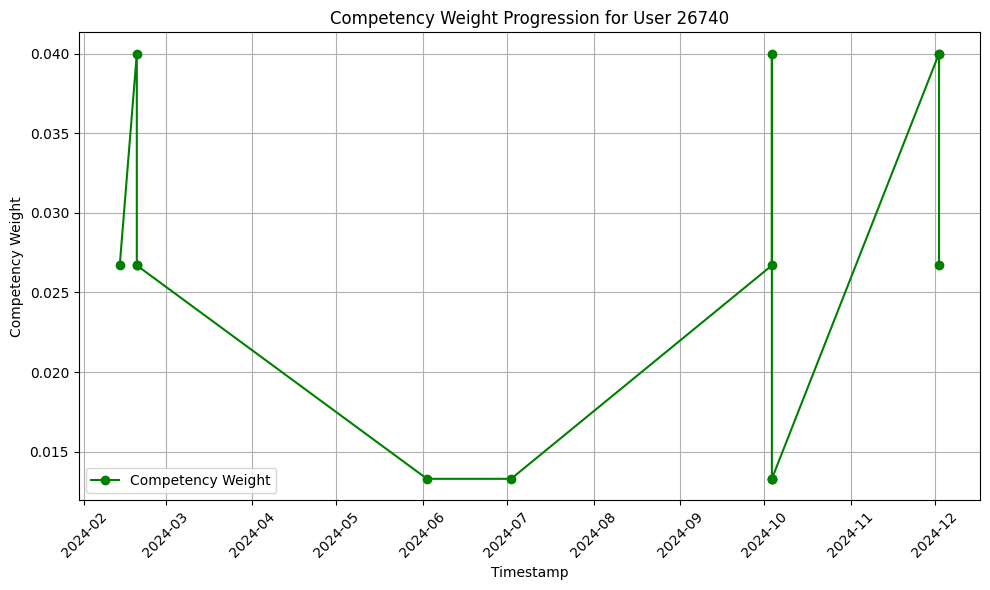

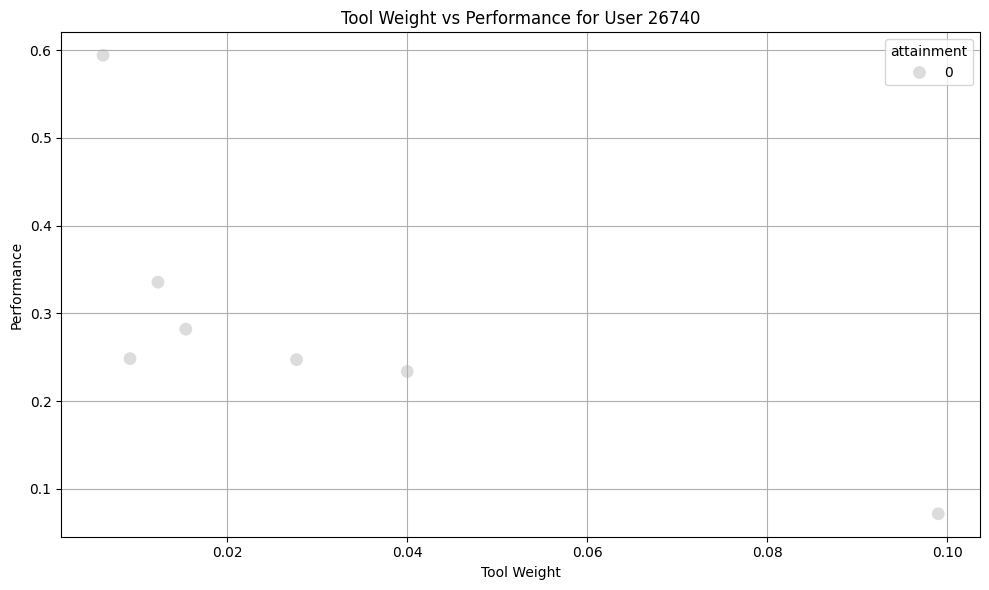

Visualizing learning path for User 26837


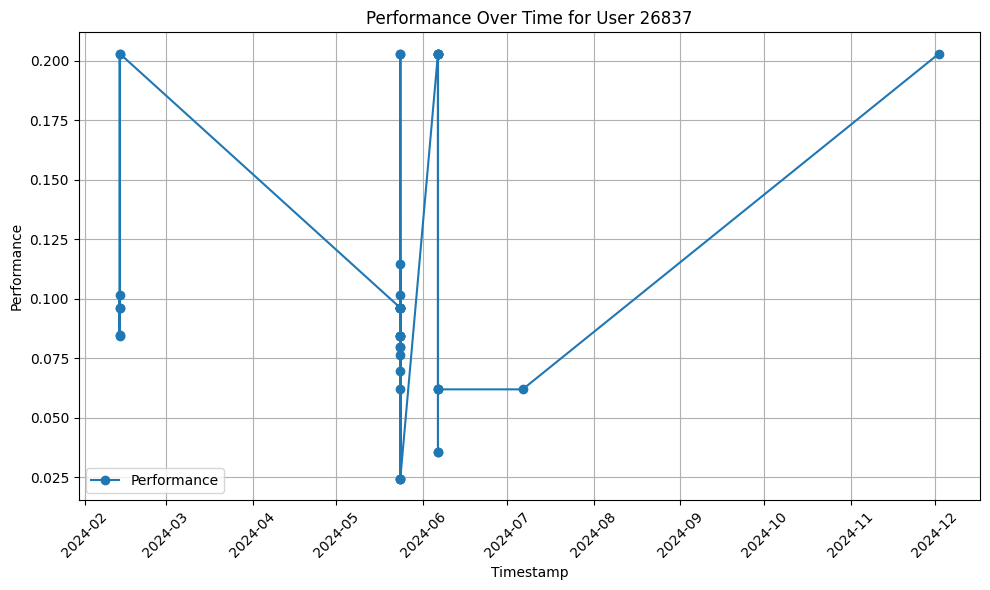

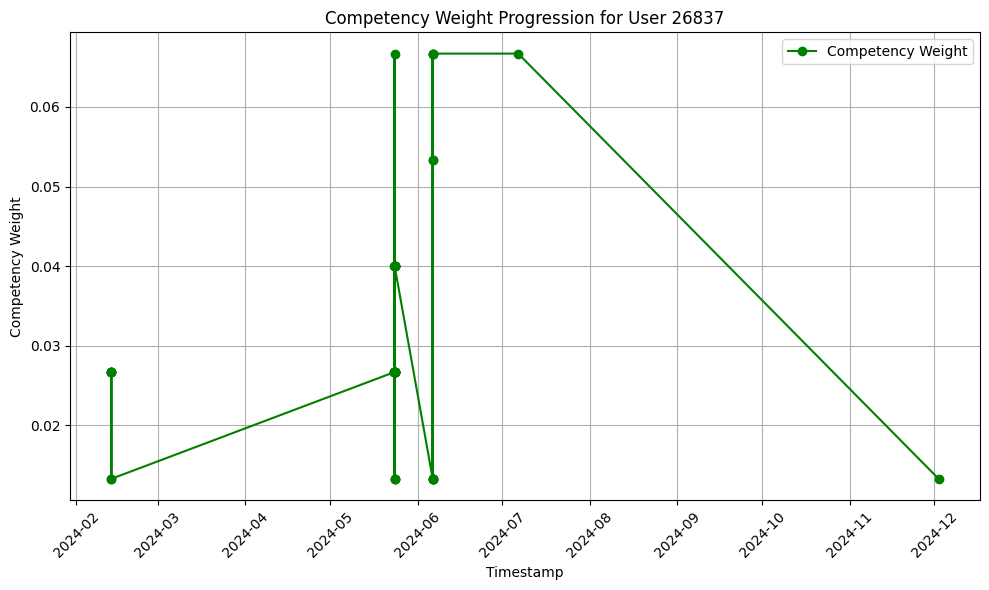

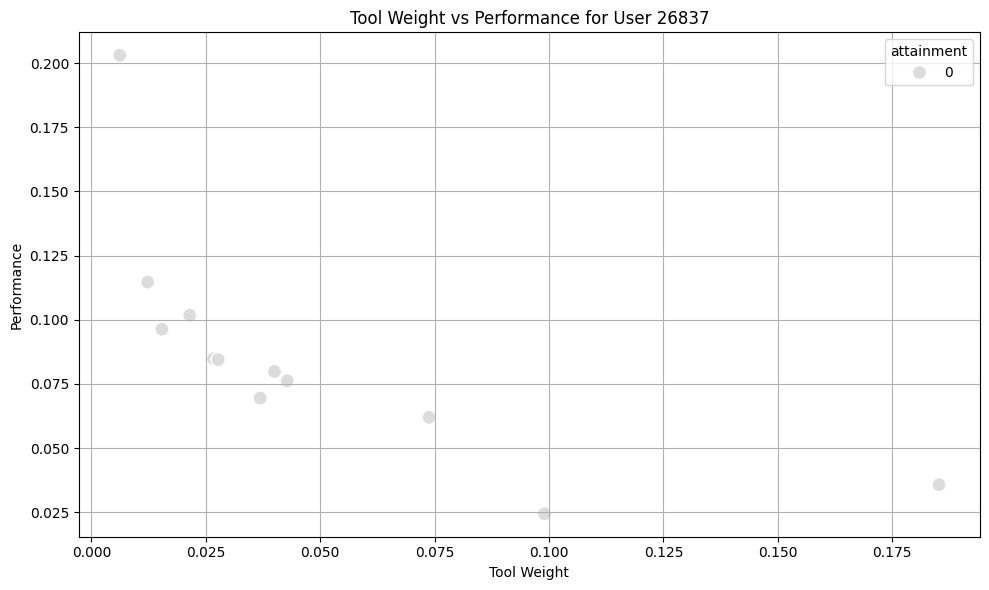

Visualizing learning path for User 26849


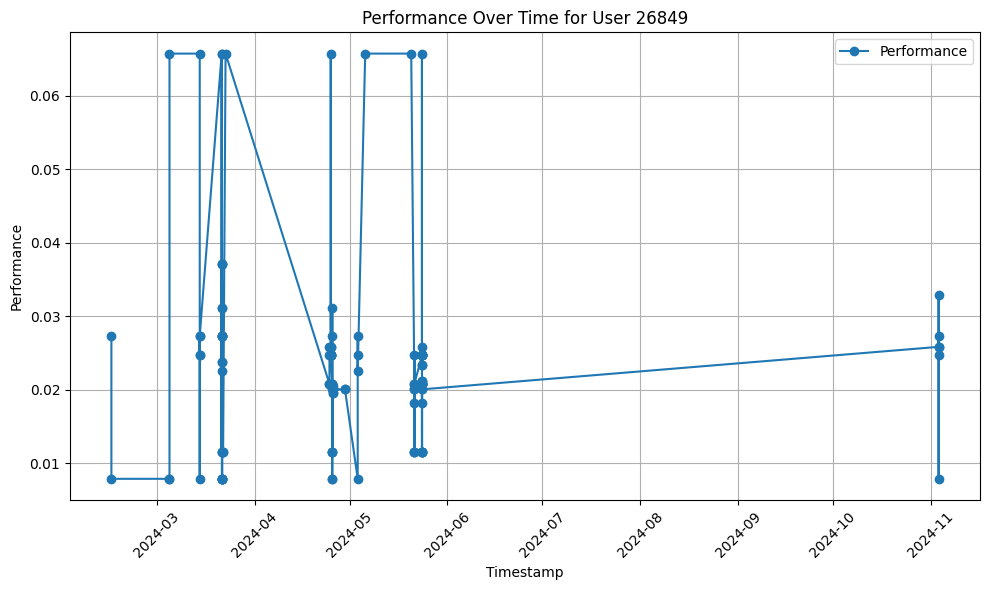

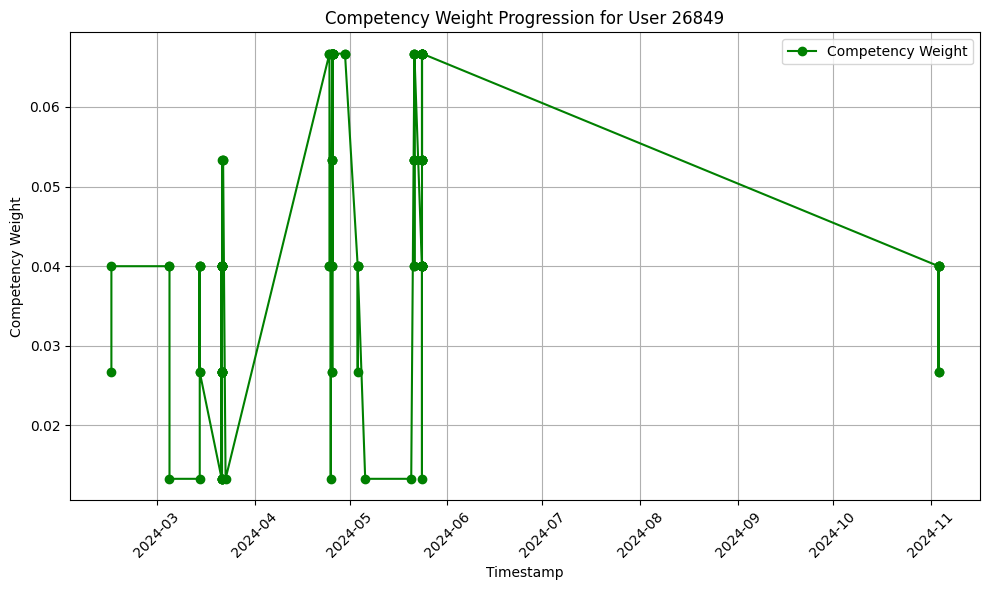

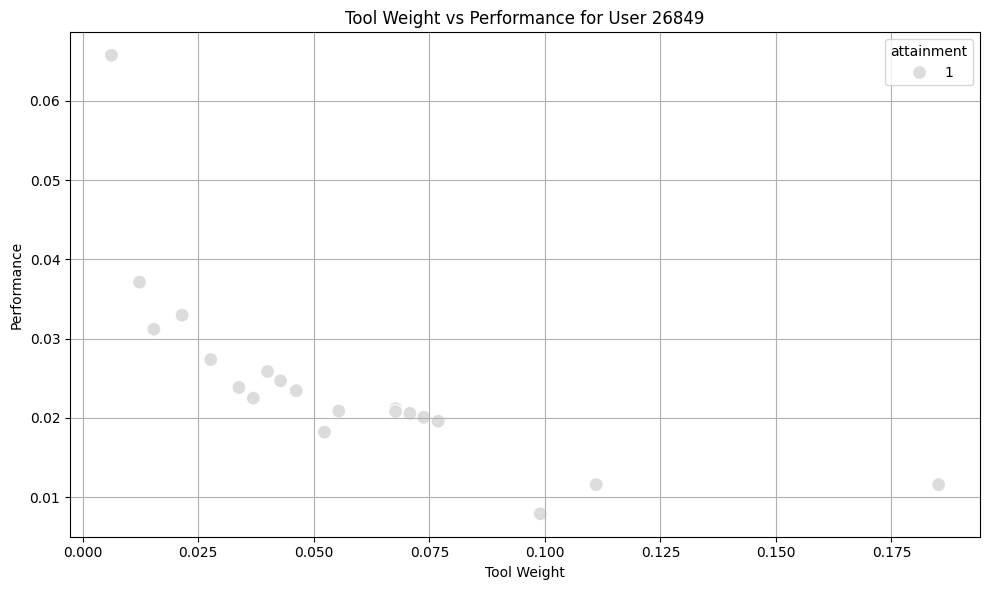

Visualizing learning path for User 26965


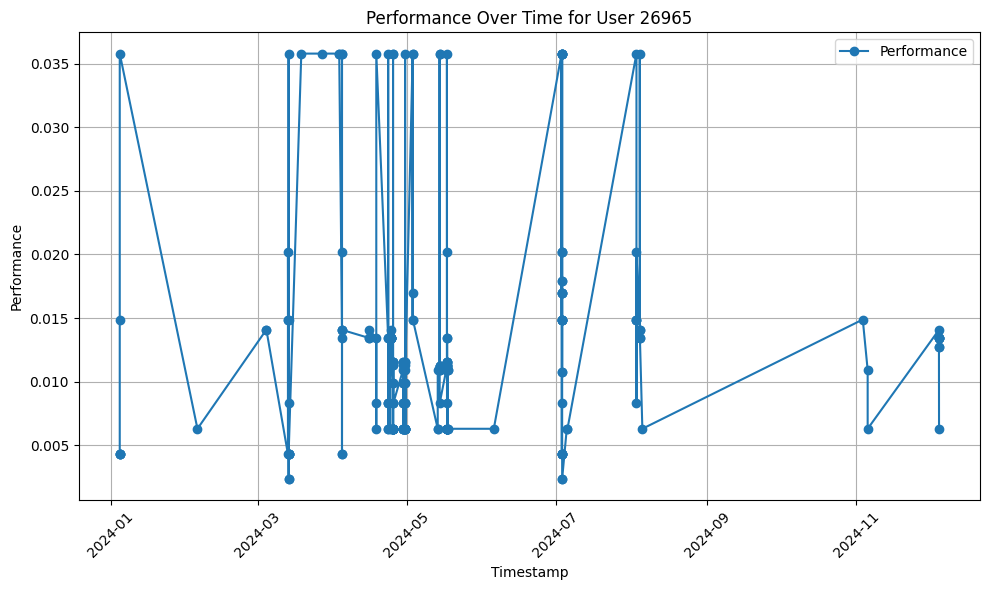

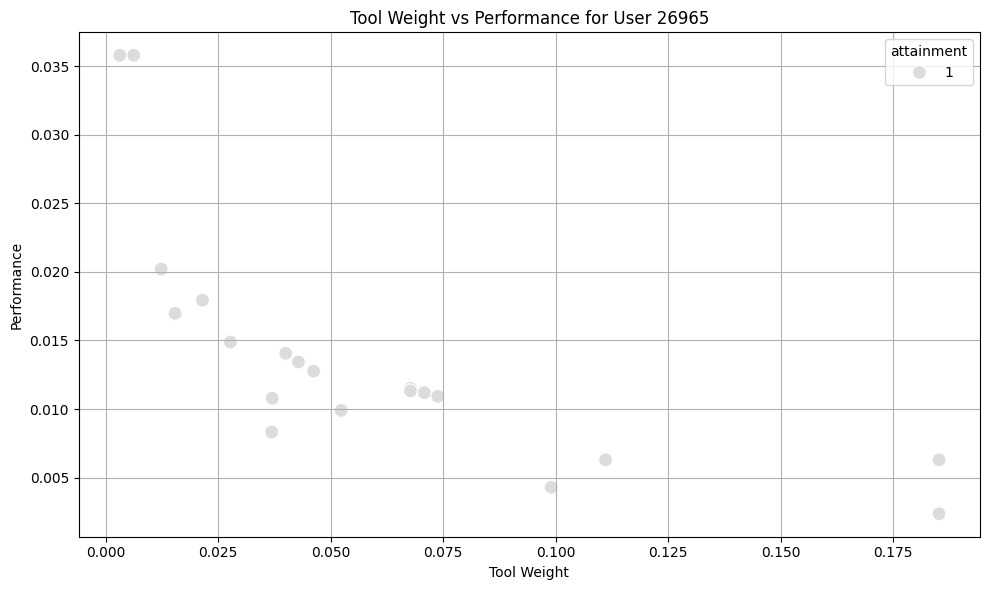

Visualizing learning path for User 26968


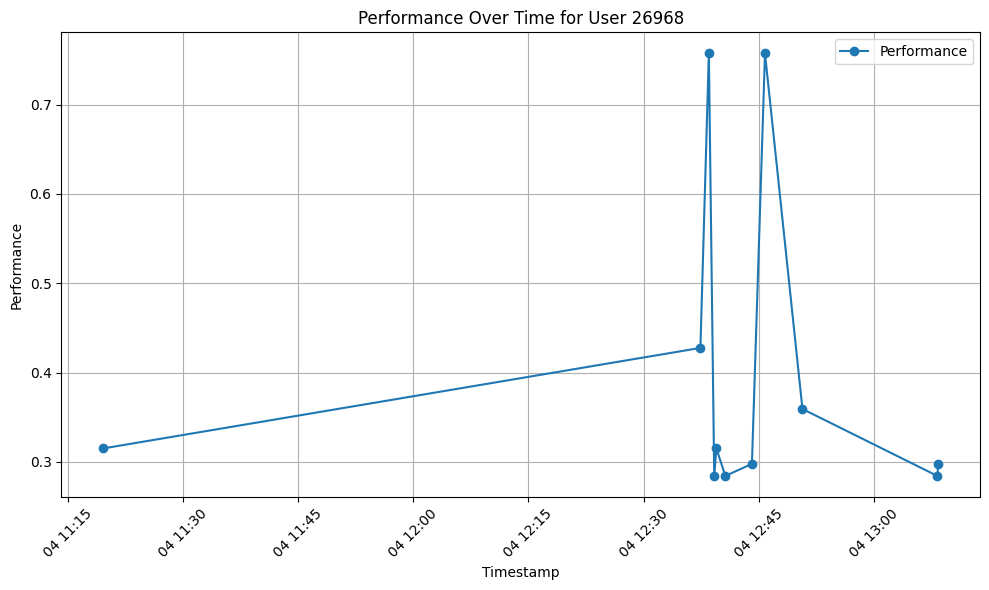

Visualizing learning path for User 26984


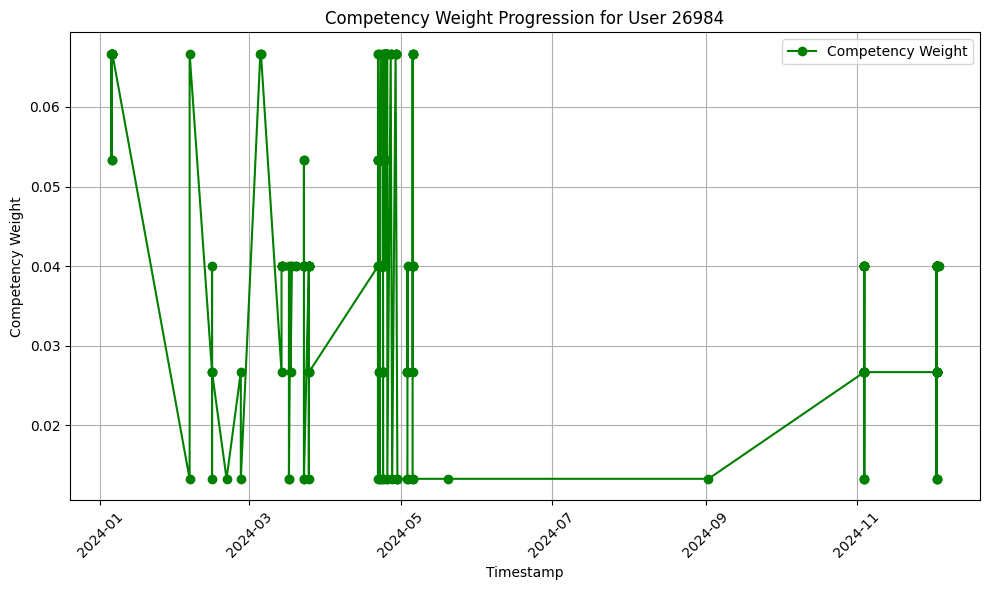

Visualizing learning path for User 27057


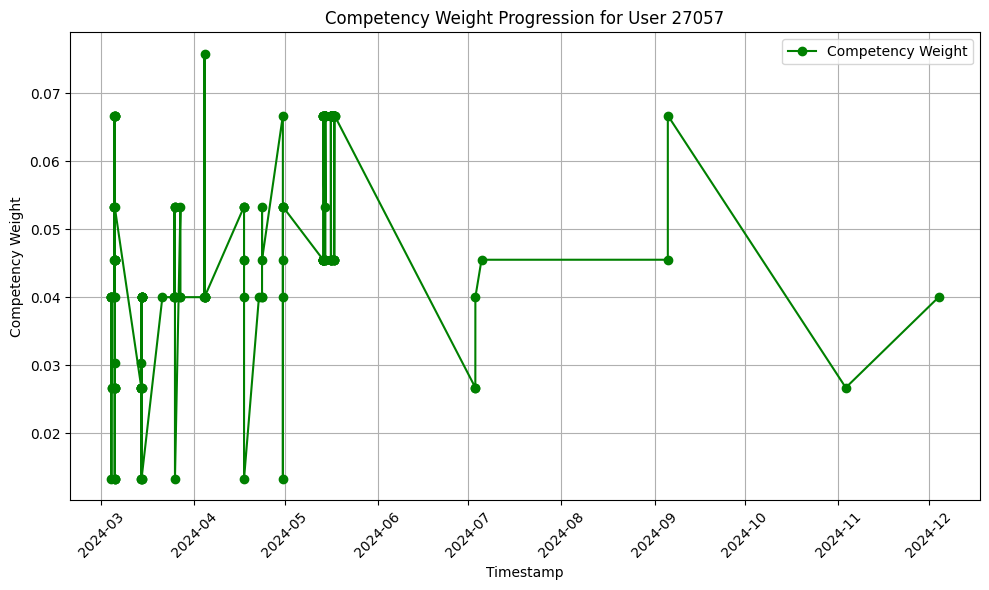

Visualizing learning path for User 27130


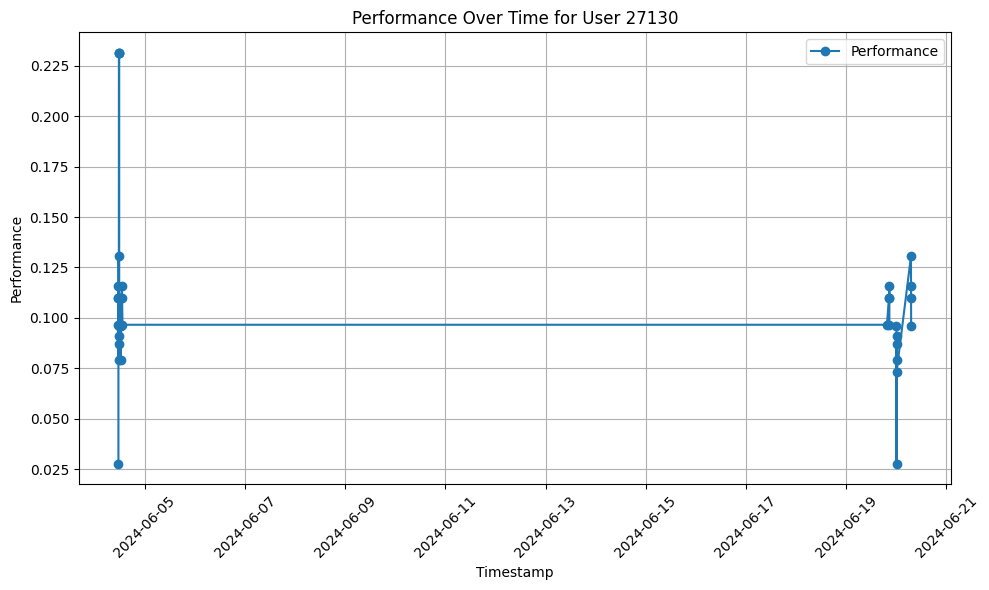

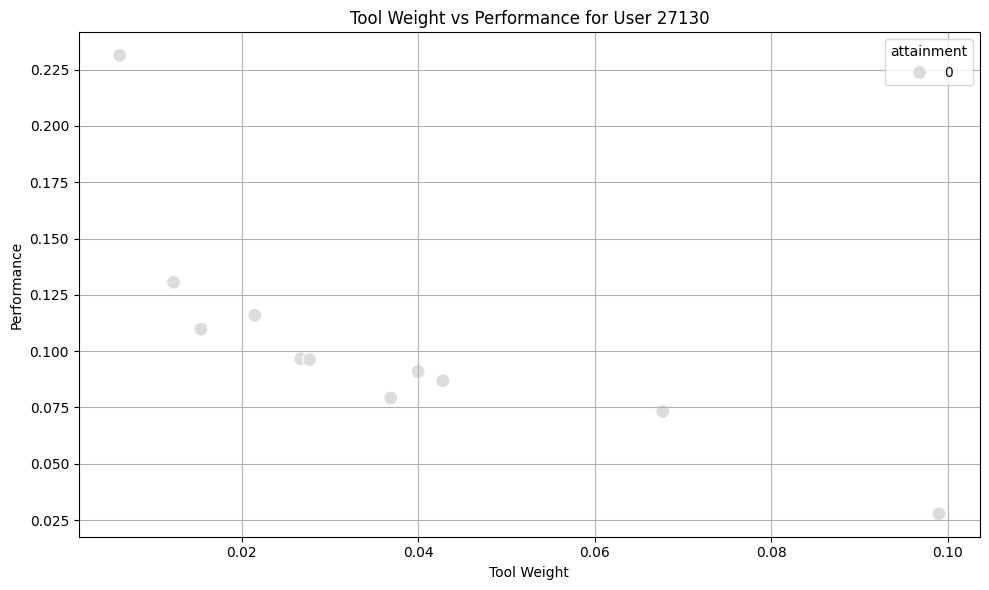

Visualizing learning path for User 27148


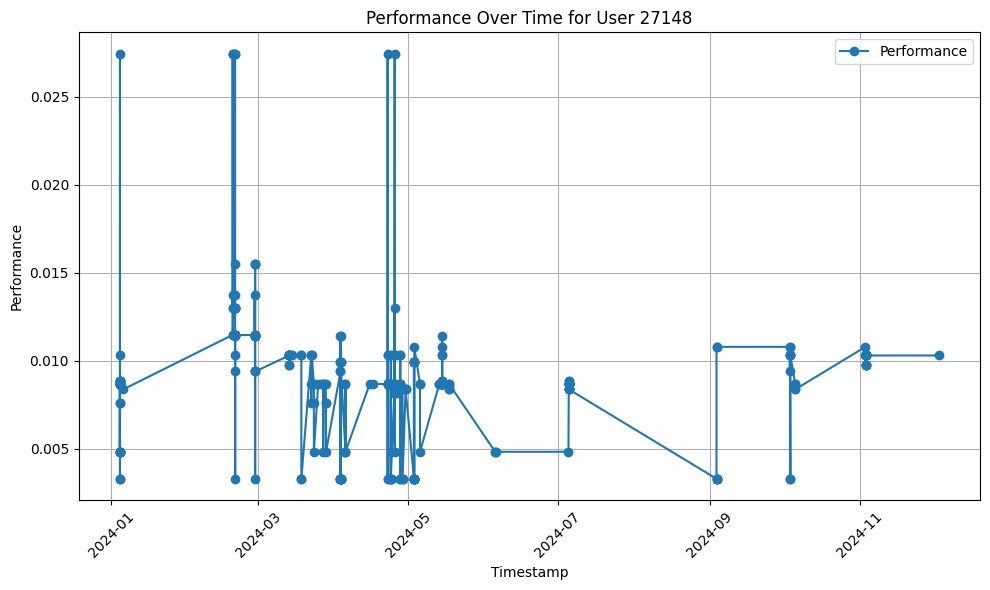

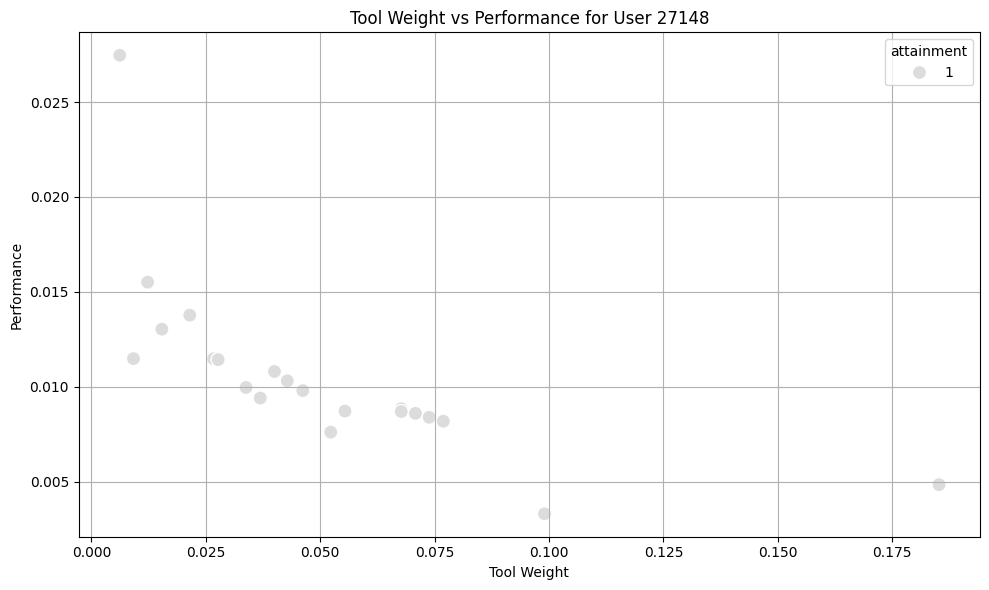

Visualizing learning path for User 27157


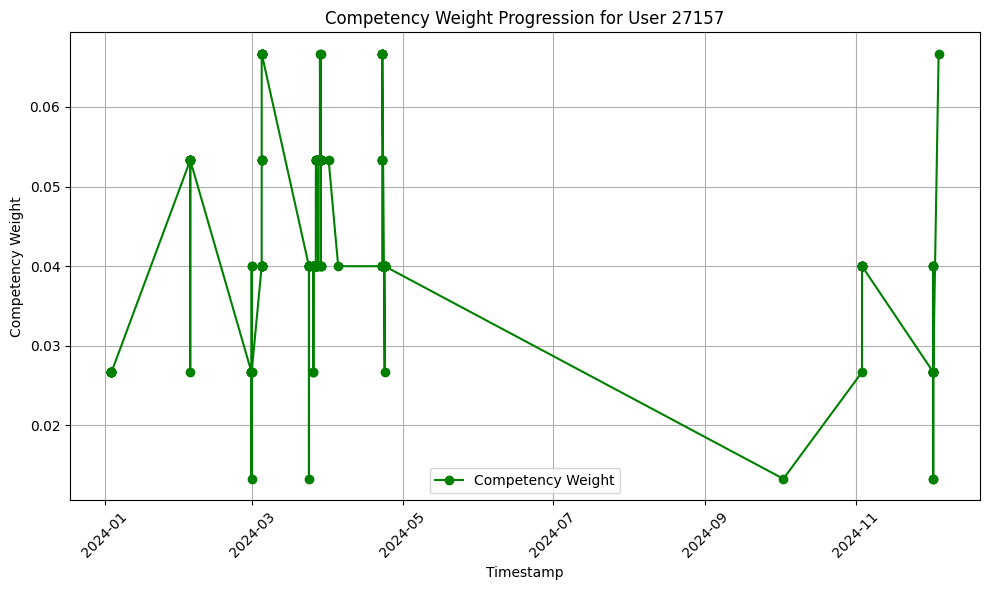

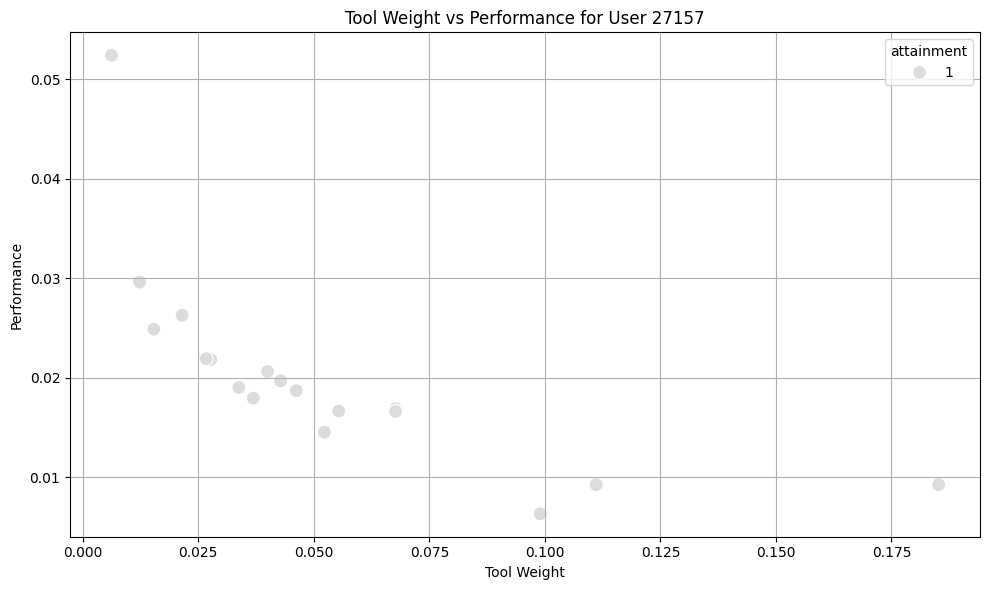

Visualizing learning path for User 29247


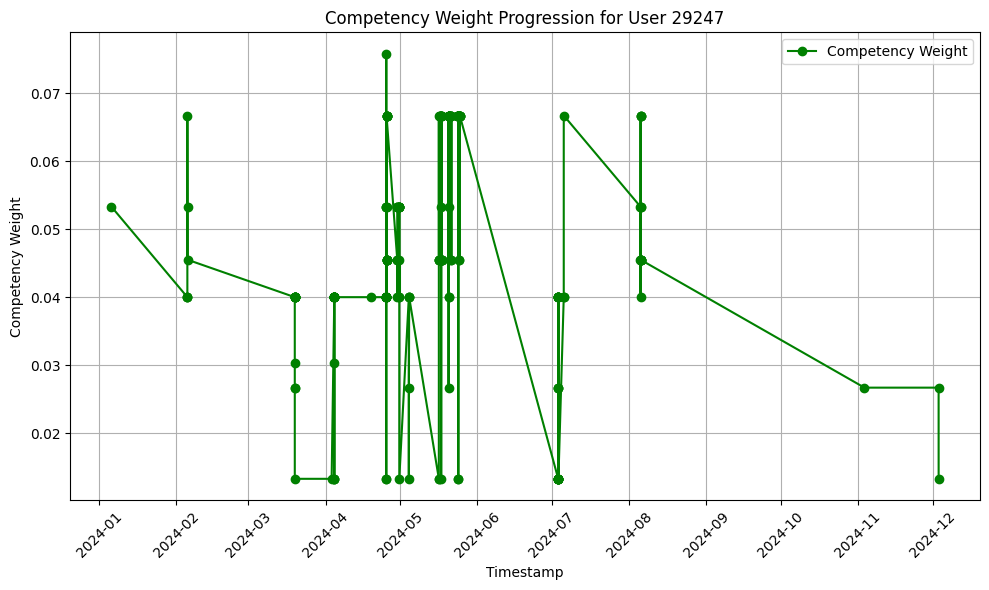

Visualizing learning path for User 29250


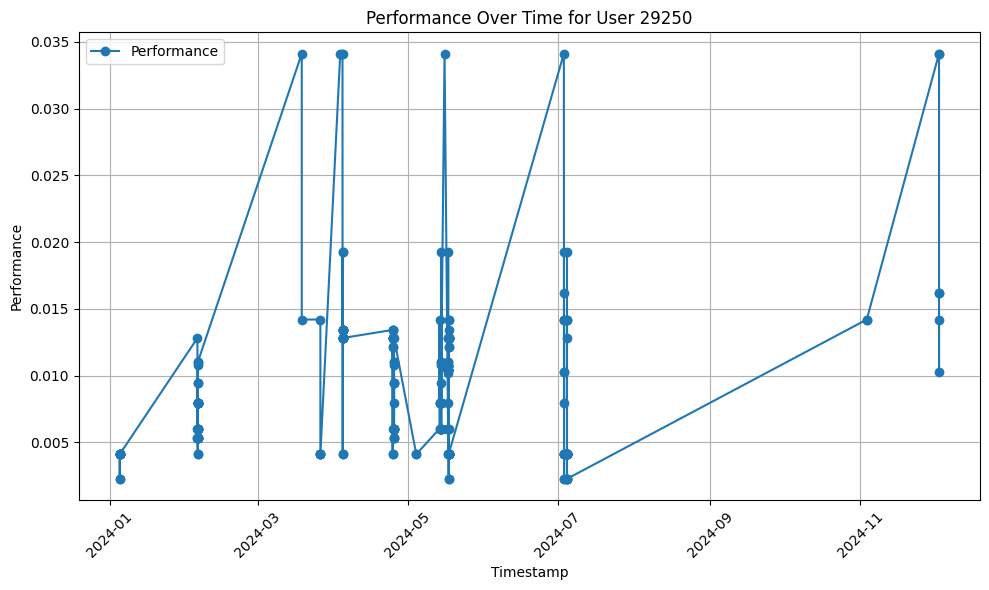

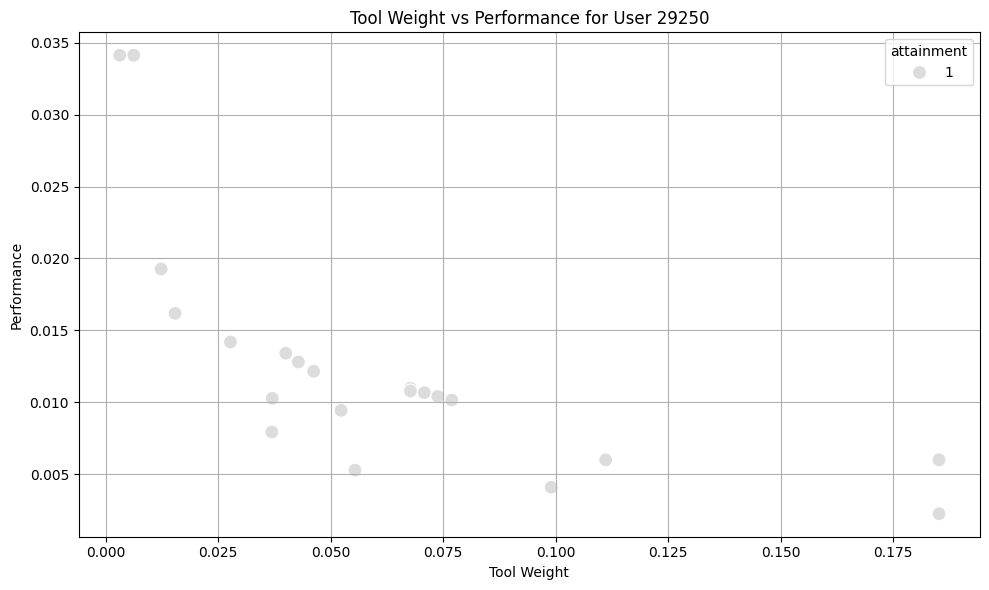

Visualizing learning path for User 29275


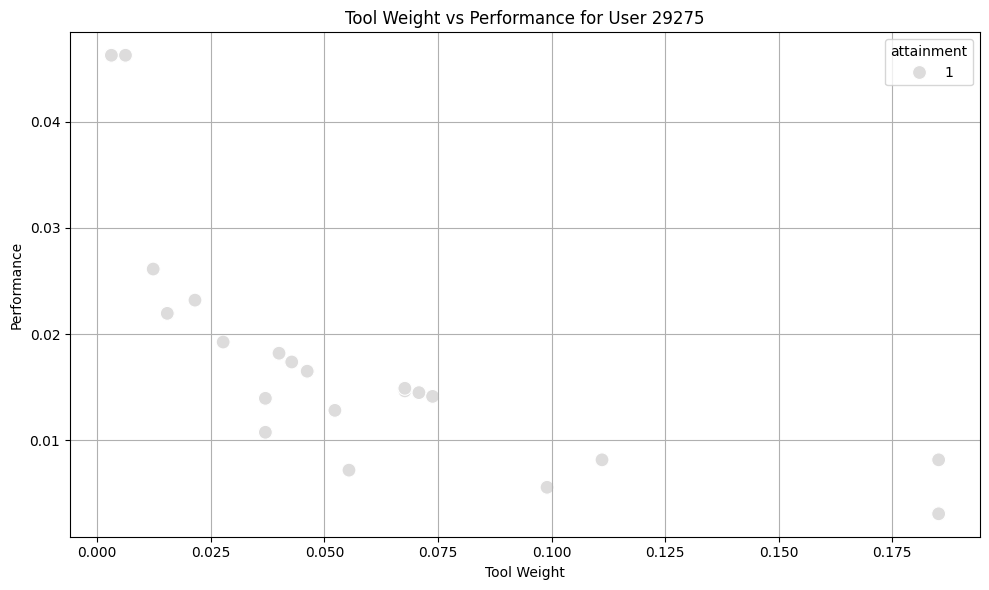

Visualizing learning path for User 29335


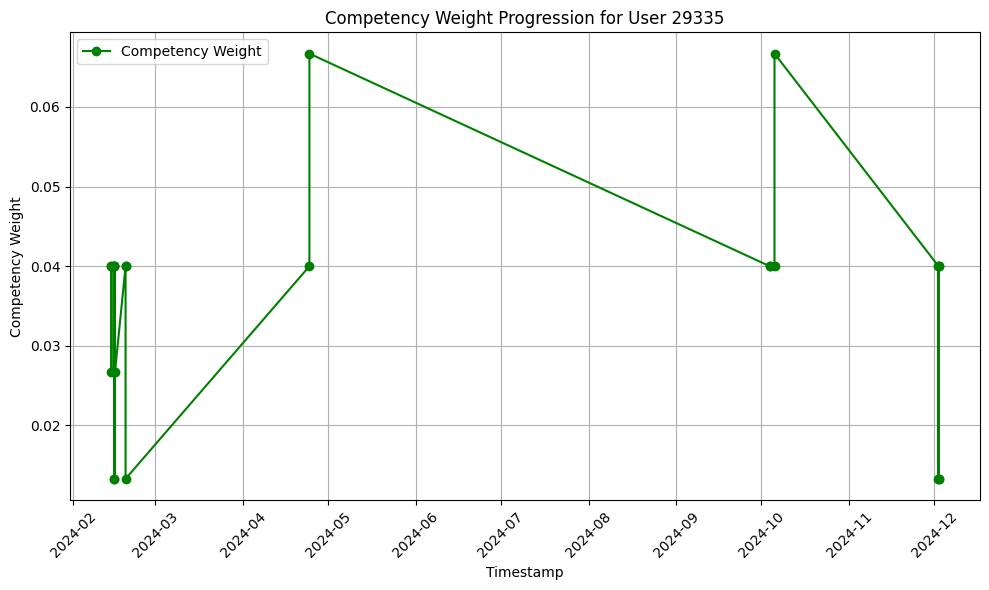

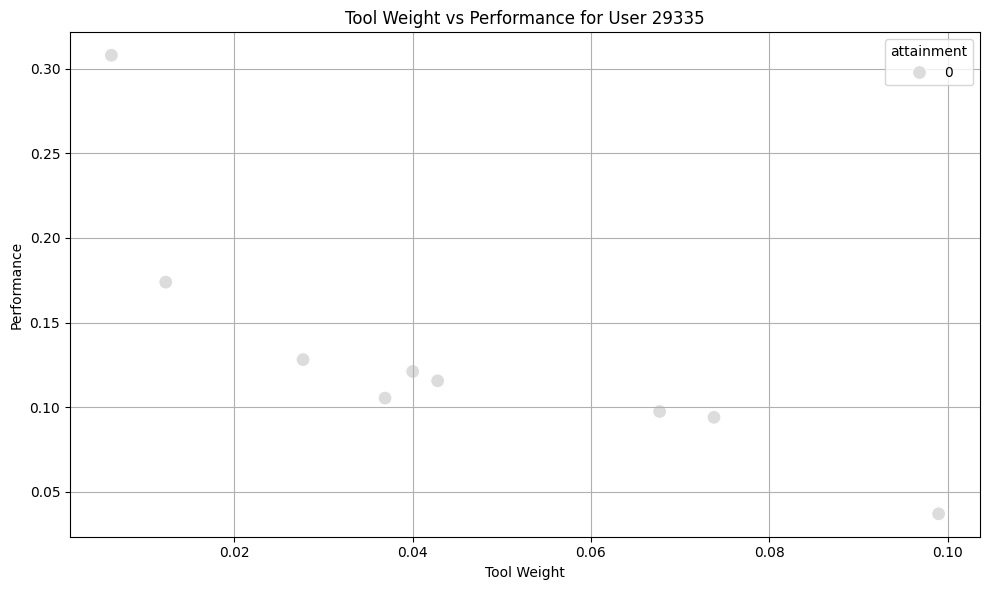

Visualizing learning path for User 29394


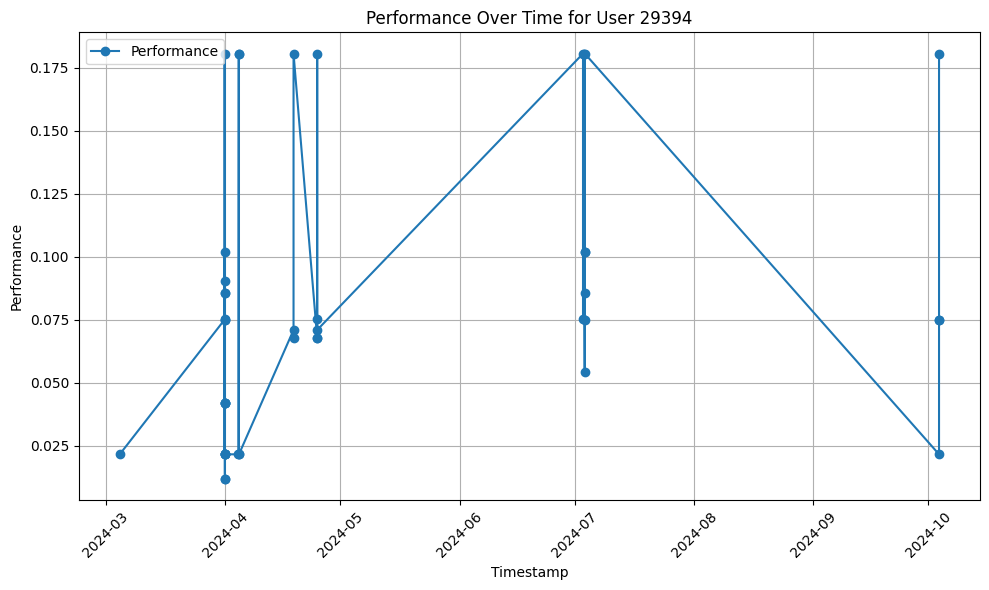

Visualizing learning path for User 29455


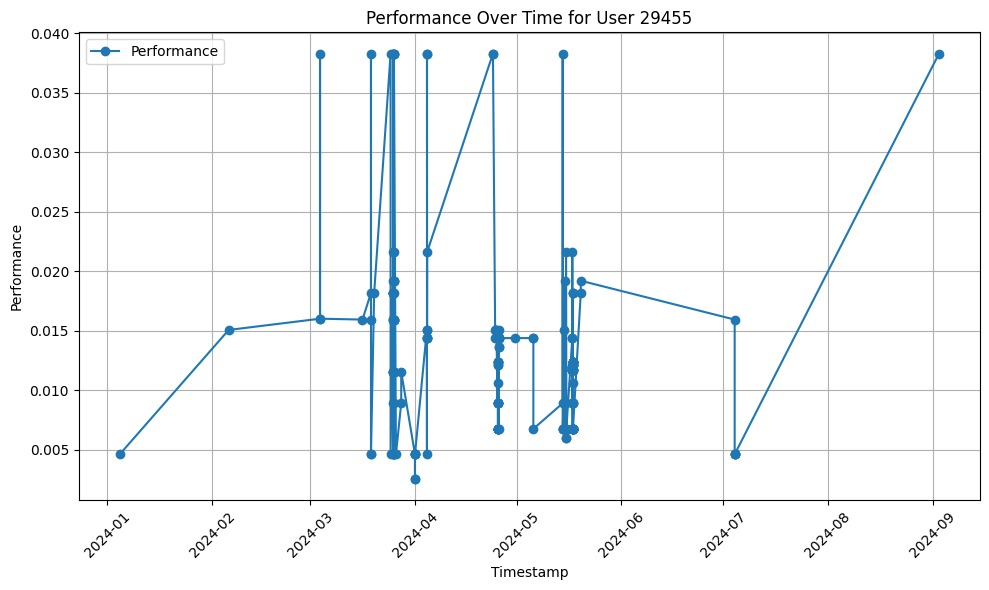

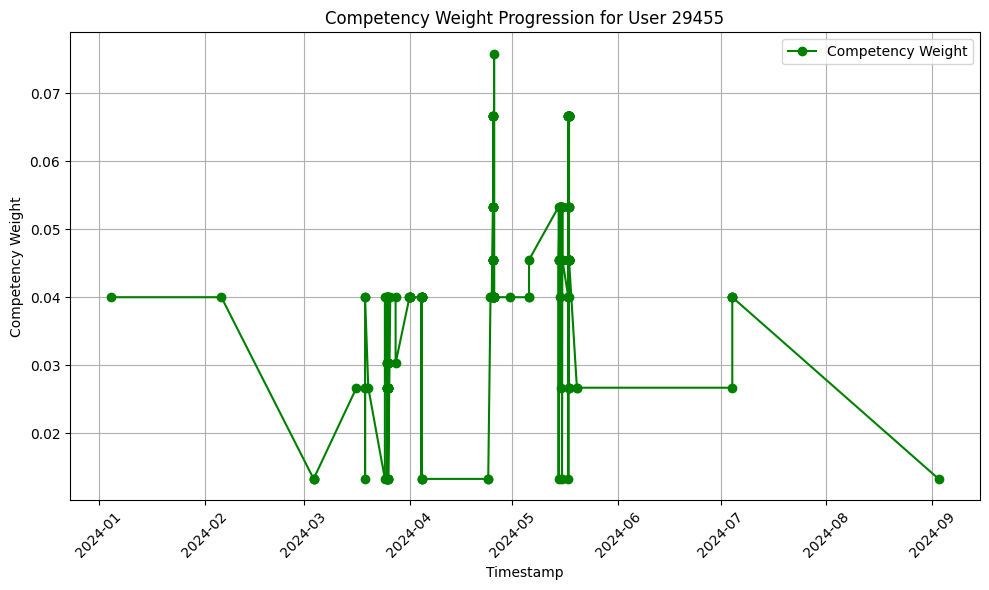

Visualizing learning path for User 29487


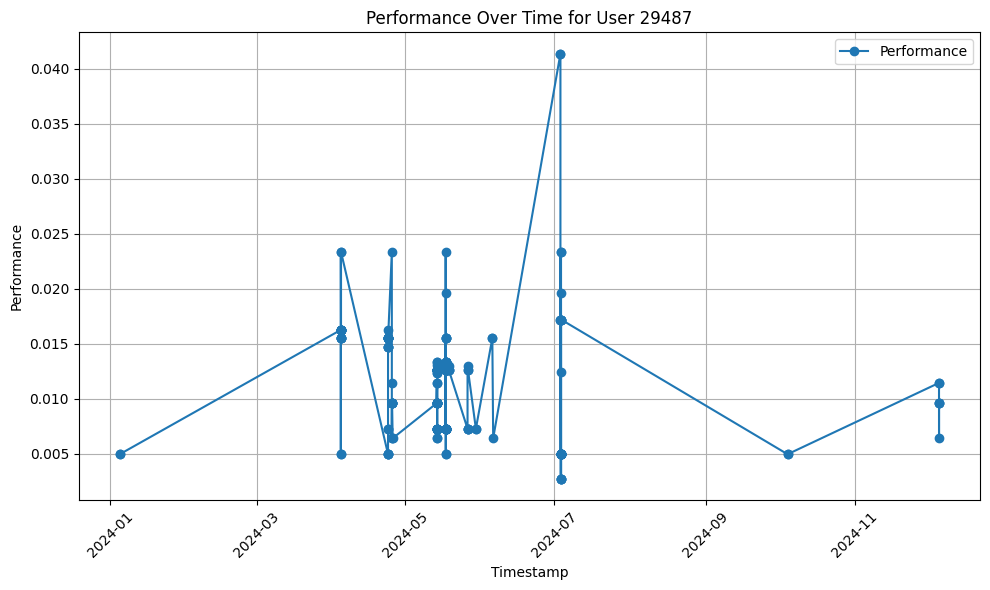

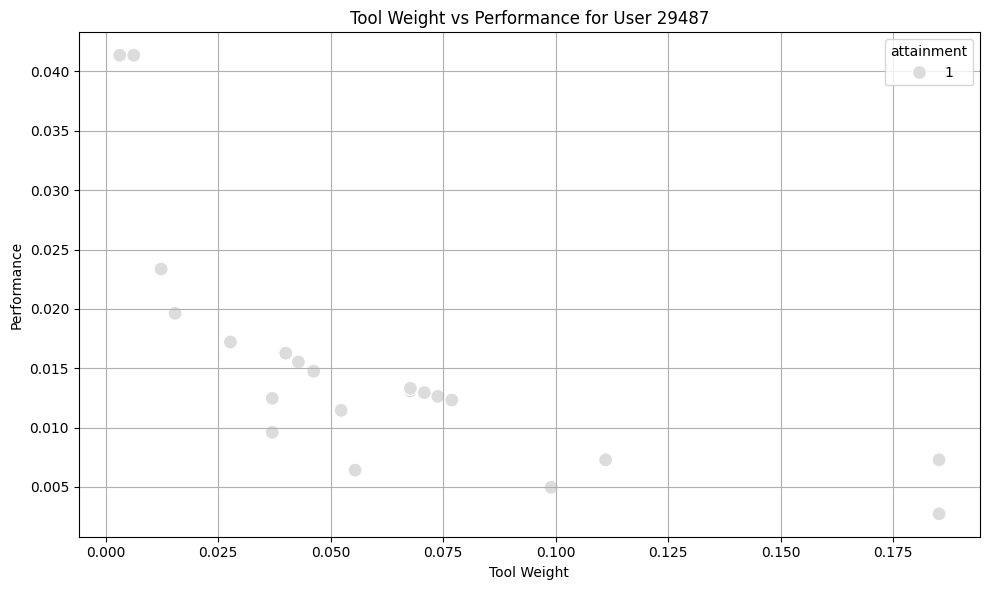

Visualizing learning path for User 29579


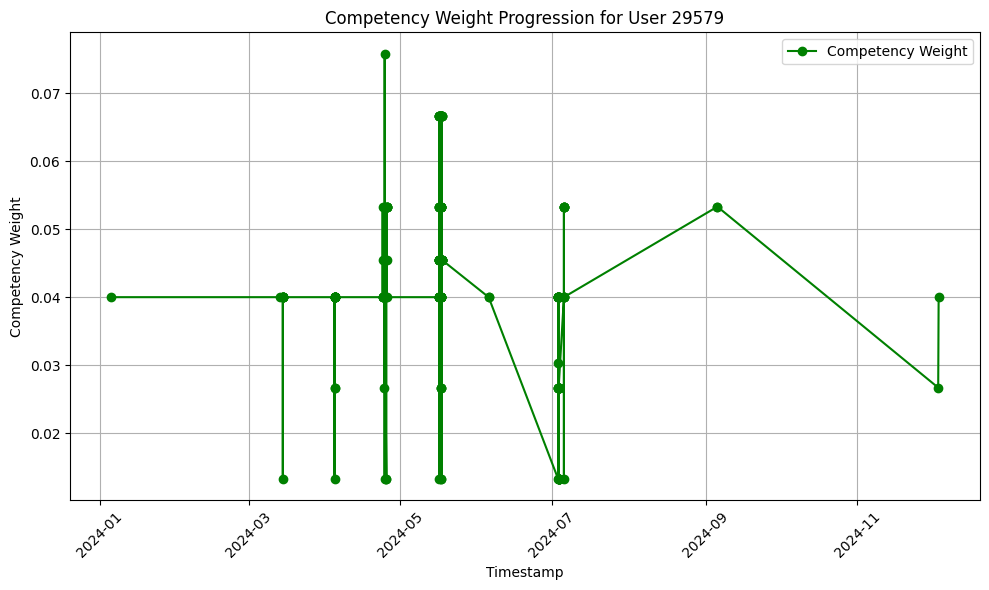

Visualizing learning path for User 29641


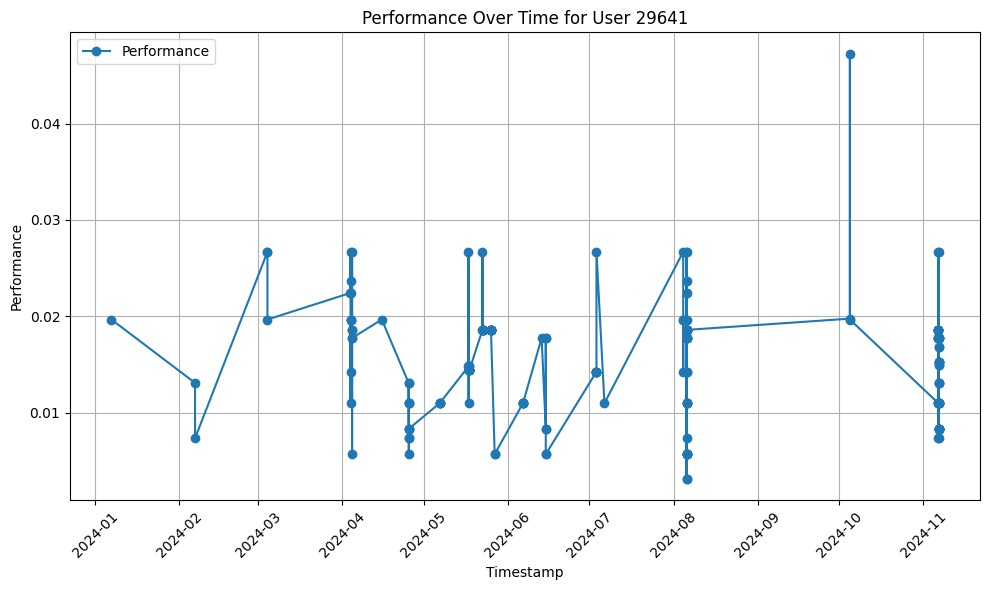

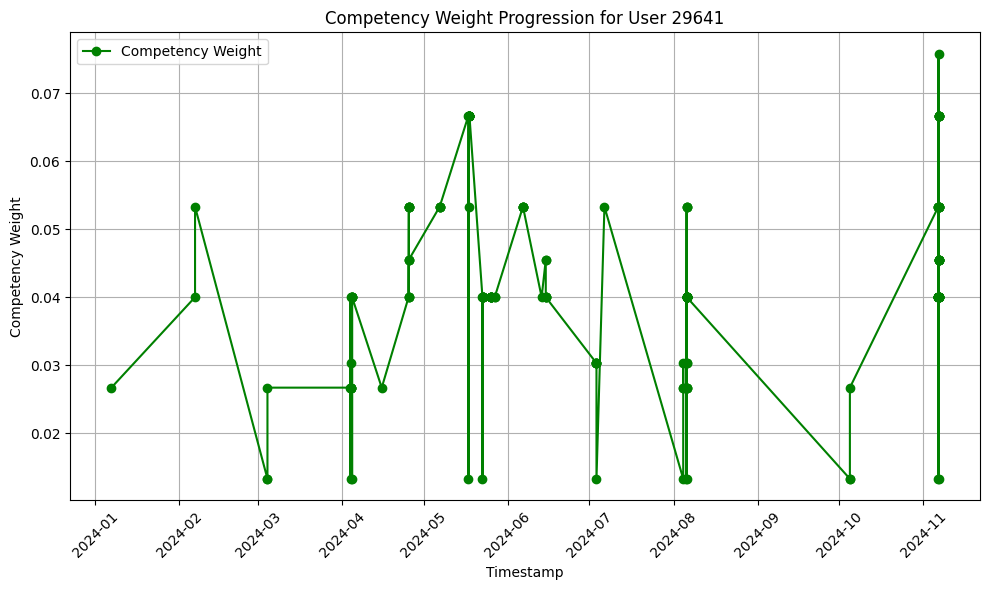

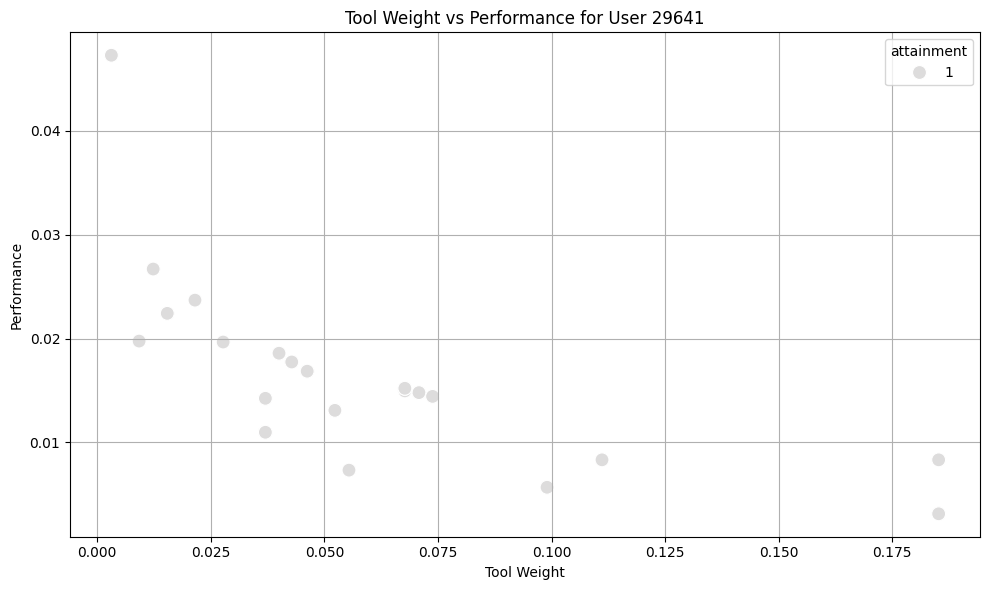

Visualizing learning path for User 29715


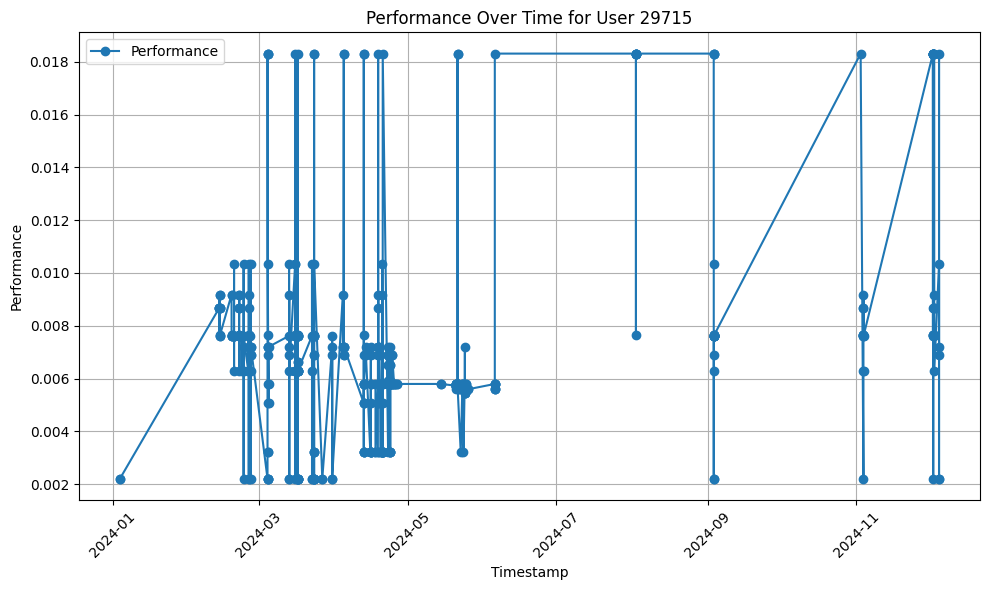

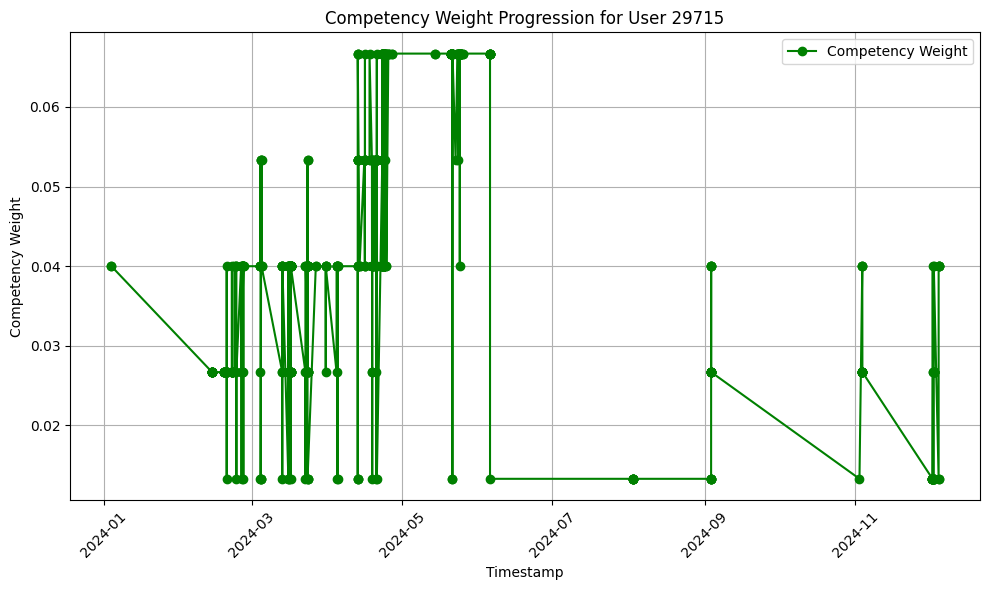

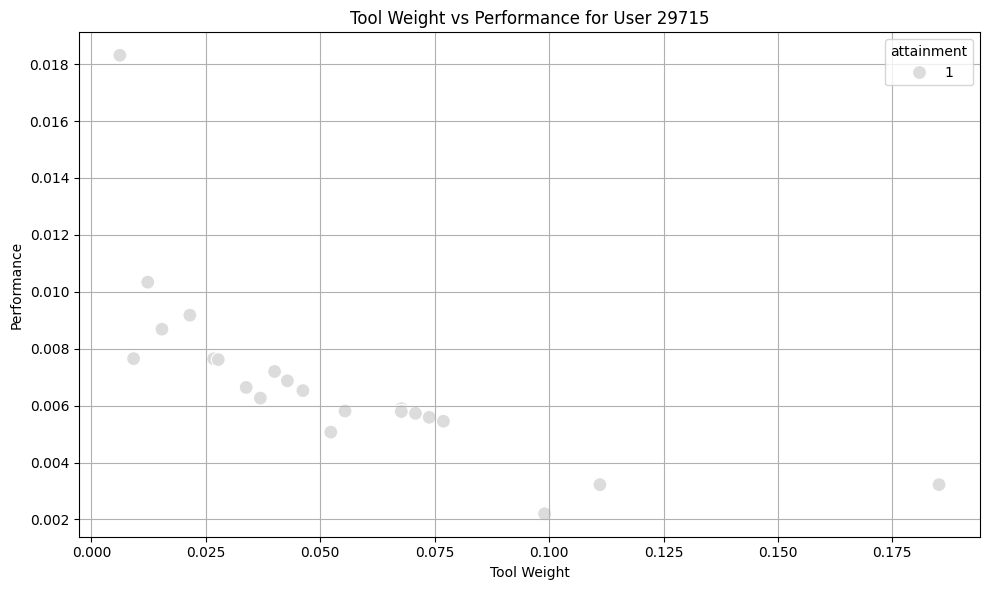

Visualizing learning path for User 29728


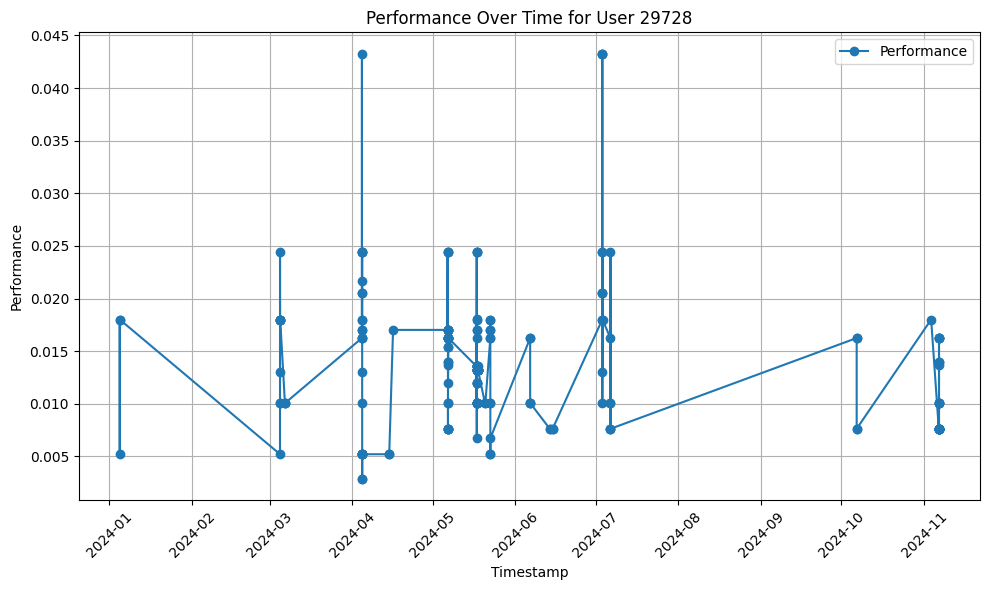

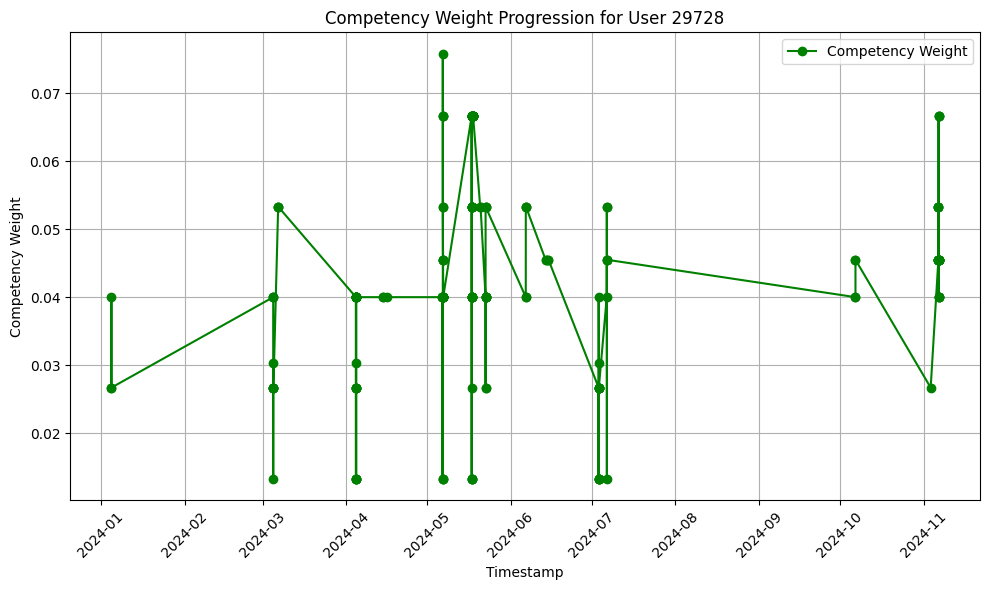

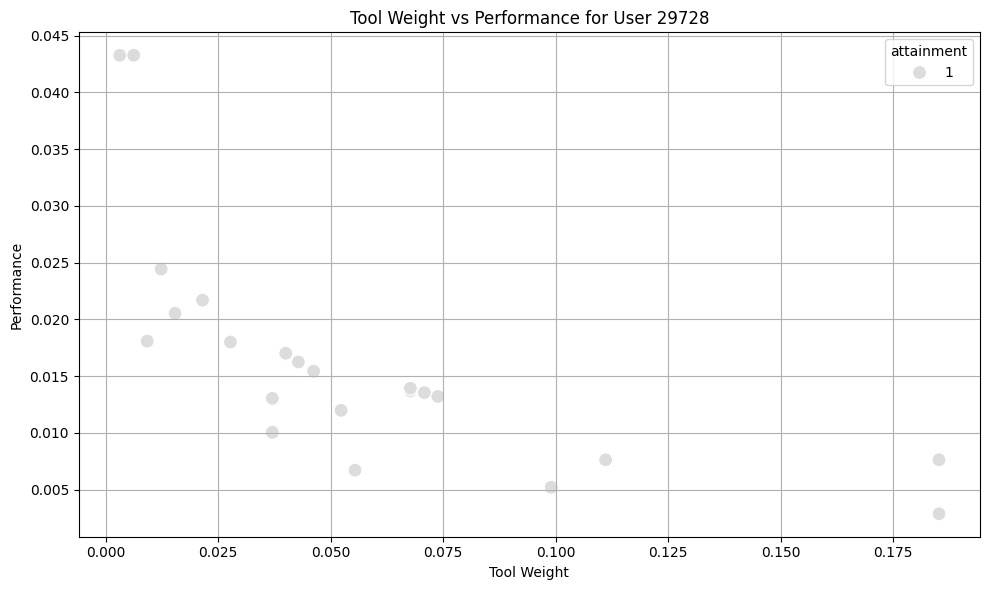

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
file_path = '/content/updated_merged_data_19102024.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 2: Sort the data by userid and timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamps are in datetime format
data = data.sort_values(by=['userid', 'timestamp'])

# Step 3: Plot performance over time for each user
def plot_performance_over_time(user_data, userid):
    plt.figure(figsize=(10, 6))
    plt.plot(user_data['timestamp'], user_data['performance'], marker='o', label='Performance')
    plt.title(f'Performance Over Time for User {userid}')
    plt.xlabel('Timestamp')
    plt.ylabel('Performance')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Step 4: Plot competency weight progression for each user
def plot_competency_progression(user_data, userid):
    plt.figure(figsize=(10, 6))
    plt.plot(user_data['timestamp'], user_data['competency_weight'], marker='o', color='green', label='Competency Weight')
    plt.title(f'Competency Weight Progression for User {userid}')
    plt.xlabel('Timestamp')
    plt.ylabel('Competency Weight')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Step 5: Plot tool usage vs performance
def plot_tool_performance_relation(user_data, userid):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=user_data['tool_weight'], y=user_data['performance'], hue=user_data['attainment'], palette="coolwarm", s=100)
    plt.title(f'Tool Weight vs Performance for User {userid}')
    plt.xlabel('Tool Weight')
    plt.ylabel('Performance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 6: Visualize for a specific user (or loop through multiple users)
# Replace 'some_userid' with the user ID of interest, or iterate through unique user IDs
for userid, user_data in data.groupby('userid'):
    print(f"Visualizing learning path for User {userid}")
    plot_performance_over_time(user_data, userid)
    plot_competency_progression(user_data, userid)
    plot_tool_performance_relation(user_data, userid)
    # Uncomment below if you want to stop after a single user visualization (to prevent too many plots)
    # break

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          7475 non-null   object 
 1   userid             7475 non-null   int64  
 2   toolid             7475 non-null   int64  
 3   activityid         7475 non-null   int64  
 4   competency_weight  7475 non-null   float64
 5   tool_weight        7475 non-null   float64
 6   activity_weight    7475 non-null   float64
 7   log_weight         7475 non-null   float64
 8   performance        7475 non-null   float64
 9   attainment         7475 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 584.1+ KB
None

First few rows of the data:
           timestamp  userid  toolid  activityid  competency_weight  \
0  1/02/24, 10:46:00   18630  233150       10503             0.0133   
1  1/03/24, 09:50:22   21041  233162       20807             0.040

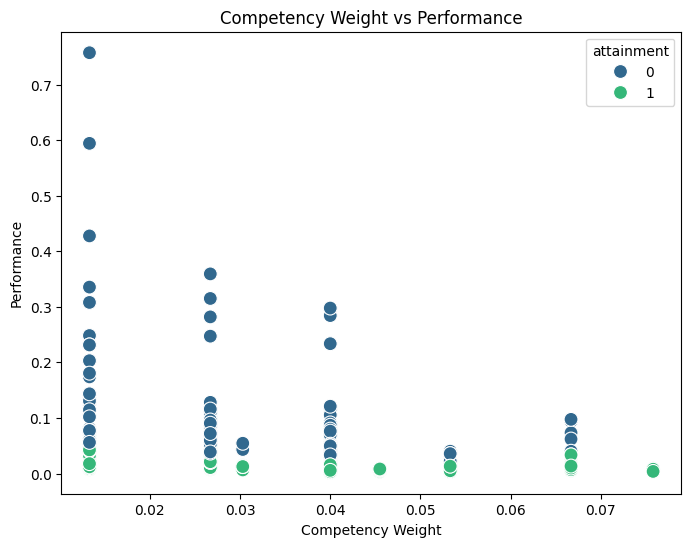

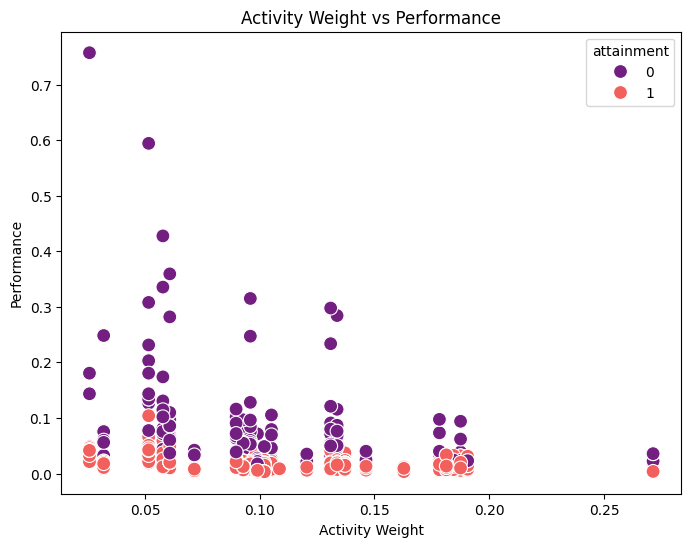

<ipython-input-13-5d6b2314e693>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='attainment', y='performance', palette='Set2')


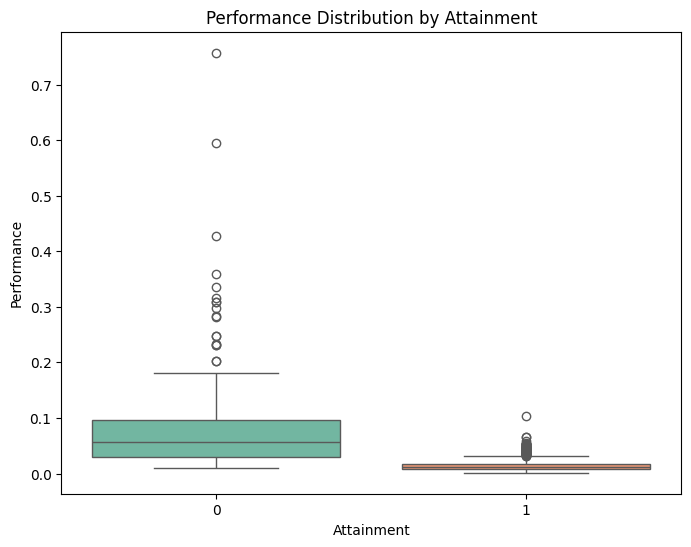

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Excel data
file_path = '/content/updated_merged_data_19102024.xlsx'  # Replace with actual path
data = pd.read_excel(file_path)

# Step 2: Basic Data Inspection
print("Data Info:")
print(data.info())

print("\nFirst few rows of the data:")
print(data.head())

# Check for duplicate entries based on userid, toolid, and activityid
duplicates = data.duplicated(subset=['userid', 'toolid', 'activityid'], keep=False)
print(f"\nNumber of duplicate rows: {duplicates.sum()}")

# Step 3: Drop duplicates (if necessary)
data_cleaned = data.drop_duplicates(subset=['userid', 'toolid', 'activityid'])

# Step 4: Summary statistics
print("\nSummary statistics:")
print(data_cleaned.describe())

# Step 5: Visualizations

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 6))
# Exclude non-numeric columns before calculating correlation
numeric_data = data_cleaned.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()

# Visualization 2: Competency Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='competency_weight', y='performance', hue='attainment', palette='viridis', s=100)
plt.title('Competency Weight vs Performance')
plt.xlabel('Competency Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 3: Tool Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='tool_weight', y='performance', hue='attainment', palette='coolwarm', s=100)
plt.title('Tool Weight vs Performance')
plt.xlabel('Tool Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 4: Activity Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='activity_weight', y='performance', hue='attainment', palette='magma', s=100)
plt.title('Activity Weight vs Performance')
plt.xlabel('Activity Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 5: Performance Distribution by Attainment Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='attainment', y='performance', palette='Set2')
plt.title('Performance Distribution by Attainment')
plt.xlabel('Attainment')
plt.ylabel('Performance')
plt.show()

# Optional: Save cleaned data to a new Excel file
# output_file = '/path/to/cleaned_data.xlsx'  # Replace with actual path
output_file = '/content/cleaned_data.xlsx'  # Changed to a valid directory
data_cleaned.to_excel(output_file, index=False)